In [1]:
%config Completer.use_jedi = False

In [4]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from scipy.stats import beta


%matplotlib inline

In [5]:
ads_data = pd.read_csv('Ads_Optimisation.csv', header=1, names = ['Ads1','Ads2','Ads3','Ads4','Ads5','Ads6','Ads7','Ads8','Ads9','Ads10'])

### 데이터 로드

In [6]:
ads_data

,Ads1,Ads2,Ads3,Ads4,Ads5,Ads6,Ads7,Ads8,Ads9,Ads10
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0
6,1,1,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


### 2000개만 가져오기

In [7]:
samples = ads_data.iloc[:2000, :]

In [8]:
# CTR of each ads, total data
Series.sort_values(ads_data.sum()/len(ads_data), ascending=False)

Ads5     0.269427
Ads8     0.209121
Ads1     0.170217
Ads2     0.129513
Ads4     0.119612
Ads7     0.111211
Ads9     0.095110
Ads3     0.072807
Ads10    0.048905
Ads6     0.012601
dtype: float64

In [9]:
# CTR of each ads, Samples 
Series.sort_values(samples.sum()/len(samples), ascending=False)

Ads5     0.2710
Ads8     0.2120
Ads1     0.1700
Ads4     0.1300
Ads2     0.1240
Ads7     0.1015
Ads9     0.0965
Ads3     0.0695
Ads10    0.0450
Ads6     0.0115
dtype: float64

#### 샘플링한 것과 전체 데이터는 거의 비슷하다, 5번 광고가 가장 CTR이 높고, 8번 순이다, 가장 낮은 CTR을 보이는 광고는 6번이다.

* 어떻게 실험할까?
 - 광고의 안은 10개이다, 샘플 수는 2000개니까 2000번 광고를 노출 시킬 것이다.  <--문제점 발견
 - 노출을 시킬 때 어떤 광고를 보여줄지 정하는 게 중요한 것 같다. Beta 분포에서 샘플링 해서 샘플링 된 rvs 값이 큰 걸 노출 시키는 방법을 사용해야겠다.
 - 광고가 노출되면, sample에서 해당 광고의 데이터로 이동해서 0이면 beta를 +1하고 1이면 alpha를 +1한다.
 - 해당 광고가 다음 노출이 될 때까지 이 상태를 유지한다.

### 시각화 코드 연습

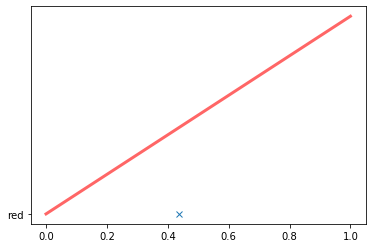

In [9]:
ads_1 = beta.rvs(1,1, size=1)
ads_1

fig, ax = plt.subplots(1, 1)


x = np.linspace(0, 1, 100)
ax.plot(x, beta.pdf(x, 2, 1), 'r-', lw=3, alpha=0.6, label='ads_1')
ax.plot(ads_1, 0, 'x', 'red')

In [94]:
#for문 돌면 i가 1씩 늘어나니까 앞에 i를 넣으면?
#뒤에 Format string을 삽입하는게 가능한가? ==> iloc에 max_rvs_ad를 넣으면 해결

for i in range(10):
    print(samples.iloc[0,i])

0
0
0
0
0
0
0
0
1
0


In [182]:
tst = 'ads_'+'{}'.format(max_rvs_ad)

In [184]:
# eval을 사용하면 str으로 얻어진 값을 객체로 변환할 수 있다!!!!!!!
eval(tst)

array([0.28651494])

In [181]:
s = 'Hello, Geeks.'
print (repr(s) )
print (repr(2.0/11.0) )

'Hello, Geeks.'
0.18181818181818182


In [ ]:
# 챔피언 광고를 구한 상태에서 챔피언 광고에 대해 베타값을 수정해주는 작업이 필요

In [ ]:
regret = 0 
total_reward = 0
regret_list = [] 
ctr = {0: [], 1: []}
index_list = [] 
impressions = [0,0] 
clicks = [0,0]
priors = (1, 1)
win_index = np.random.randint(0,2,1)[0] ## randomly choose the first shown Ad

for i in range(n):    
    impressions[win_index] += 1
    did_click = bernoulli.rvs(ACTUAL_CTR[win_index])
    
    if did_click:
        clicks[win_index] += did_click
    
    ctr_0 = random.betavariate(priors[0]+clicks[0], priors[1] + impressions[0] - clicks[0])
    ctr_1 = random.betavariate(priors[0]+clicks[1], priors[1] + impressions[1] - clicks[1])
    win_index = np.argmax([ctr_0, ctr_1])
    index_list.append(win_index)
    
    ctr[0].append(ctr_0)
    ctr[1].append(ctr_1)
    
    regret += max(ACTUAL_CTR) - ACTUAL_CTR[win_index]
    regret_list.append(regret)    
    total_reward += did_click

    
## plot the Beta distributions
x = np.arange (0, 1, 0.01)
y = beta.pdf(x, priors[0]+clicks[0], priors[1] + impressions[0] - clicks[0])
y /= y.max() ## normalize


win하는 index가(win_index)있고 index에 맞는, 숫자에 해당하는 init_alpha_1,2,3,4중 하나에 +1을 해주려고 하는데
대충 init_alpha_{win_index} += 1 이런 식으로 동작하려면 어떻게 해야하는지?

In [199]:
id(eval('init_alpha_' + '{}'.format(win_index)))

4537554256

In [201]:
id(init_alpha_1)

4537554256

In [275]:
beta.rvs(5000,init_beta_1, size=1)

array([0.99995808])

In [279]:
'ads_'+'{}'.format(win_index)

'ads_2'

In [112]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)

#max_rvs를 가져와서 해당 값을 가진 광고를 찾는 코드
ads_rvs=[ads_1, ads_2, ads_3, ads_4]
print(ads_rvs)
max_rvs = np.max(ads_rvs)
win_index = ads_rvs.index(max_rvs)
win_index
#print('ads_'+'{}'.format(win_index))

# eval('ads_'+'{}'.format(win_index))
# eval('init_alpha_' + '{}'.format(win_index+1))

##### 해당 ad 들어가서 0일때 1일 때 alpha, beta값 조정
# ads 별로 0 1값을 바로 rvs에 넣으면?

[array([0.35715326]), array([0.08920128]), array([0.65963647]), array([0.87369407])]


3

In [81]:
print(samples.iloc[:100,0].sum(),samples.iloc[:100,1].sum(),samples.iloc[:100,2].sum(),samples.iloc[:100,3].sum())

8 15 7 13


In [90]:
print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)

1 1 1 1


In [116]:
samples.iloc[:100, :3]

,Ads1,Ads2,Ads3
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,1,1,0
5,0,0,0
6,1,1,0
7,0,0,0
8,0,0,1
9,0,0,0


### 테스트 코드

2
1 1 1 1
2
1 1 1 1
2
1 1 1 1
1
1 1 1 1
3
1 1 1 1
0
1 1 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
1
2 3 1 1
1
2 3 1 1
3
2 3 1 1
1
2 3 1 1
2
2 3 1 1
1
2 3 1 2
2
2 4 1 2
3
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 2 2
1
2 4 2 2
1
2 4 2 2
1
2 4 2 2
0
2 4 2 2
1
2 4 2 2
1
2 4 2 2
0
2 4 2 2
1
2 4 2 2


/Users/sanghyub/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


1
2 4 2 2
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
0
2 4 2 3
3
2 4 2 3
3
2 4 2 3
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
1
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
1
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
0
2 4 2 3
0
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
0
3 5 2 3
0
3 5 2 3
0
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
0
3 5 2 3
1
3 5 2 3
3
3 5 2 3
1
3 5 2 3
0
3 5 2 3
1
3 6 2 3
1
3 6 2 3
1
3 6 2 3
1
3 7 2 3
1
3 7 2 3
1
3 7 2 4
1
3 7 2 4
1
3 7 2 4
0
3 7 2 4
0
3 7 2 4
1
3 7 2 4
1
3 7 2 4
1
3 7 2 4
3
3 7 2 4
1
3 7 2 4
3
3 7 2 4
3
3 7 2 4
1
3 7 2 4
3
3 7 2 4
1
3 7 2 4
0
3 7 2 4
0
3 7 2 4
0
3 7 2 4
1
3 7 2 5
1
3 7 2 5
3
3 7 2 5
3
3 7 2 5
2
3 7 2 5
0
3 7 2 5
1
3 7 2 5
1
3 7 2 5
2
3 7 2 5
0
3 7 2 5
3
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 6
0
3 7 2 6
3
3 7 2 6
1
3 7 2 6
3
3 7 2 6
0
3 7 2 6
3
3 7 2 6
1
3 7 2 6
1
3 7 2 6
3
3 7 2 6
1
3 7 2 6
1
3 7 2 6
0
3 7 2 6
0
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6


1
6 37 18 31
1
6 37 18 31
0
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
0
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 32
3
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 33
1
6 37 18 33
1
6 37 18 33
1
6 37 18 34
3
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
0
6 37 18 34
3
6 37 18 34
3
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
3
6 37 18 34

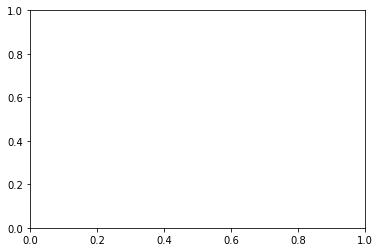

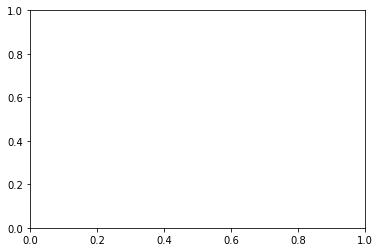

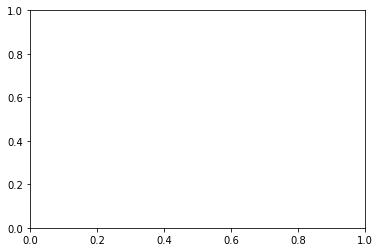

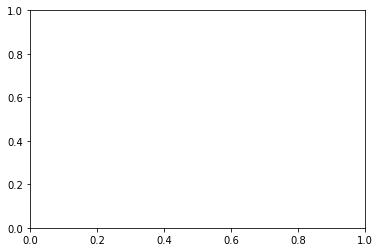

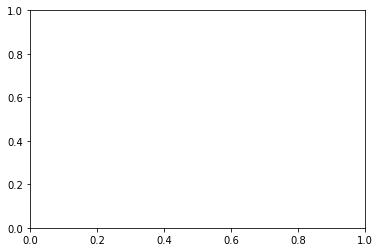

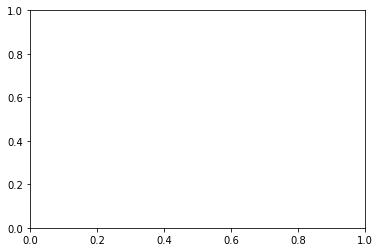

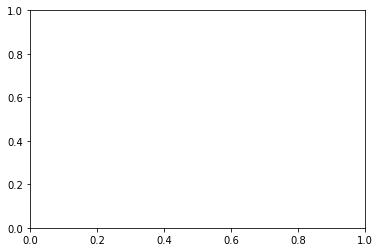

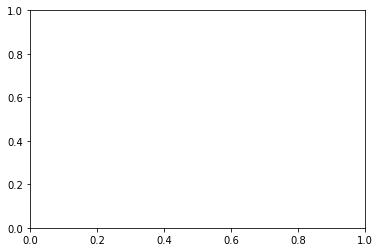

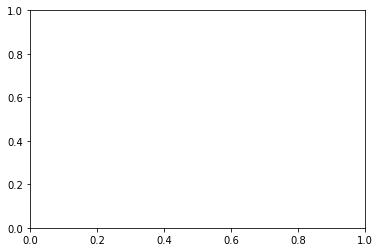

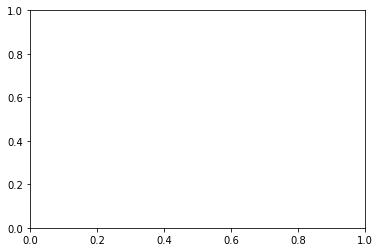

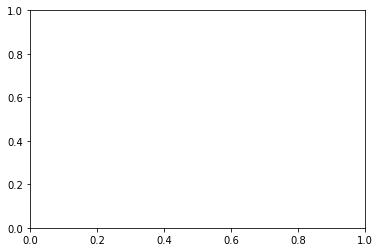

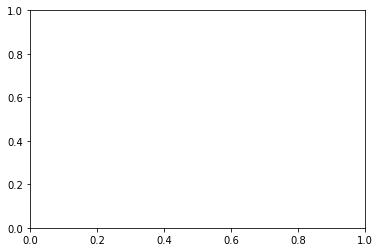

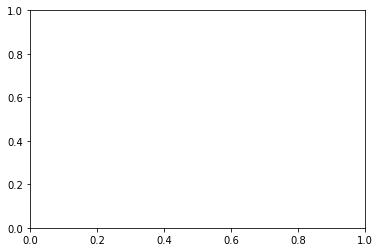

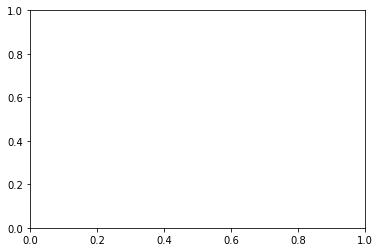

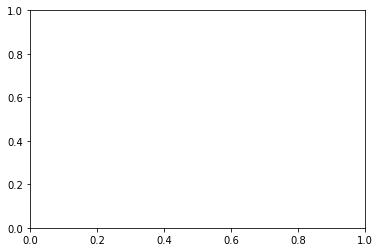

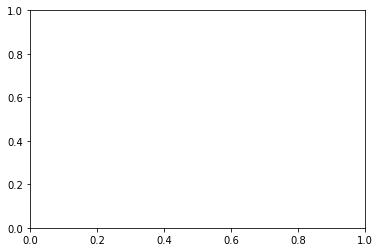

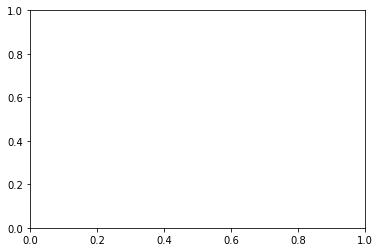

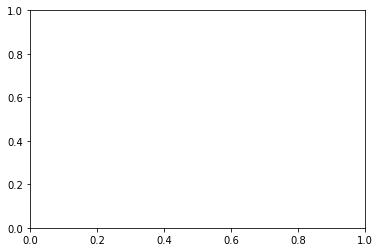

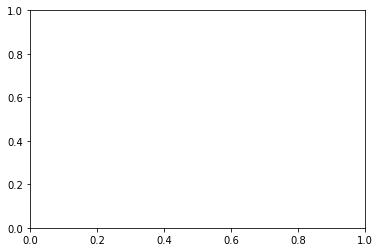

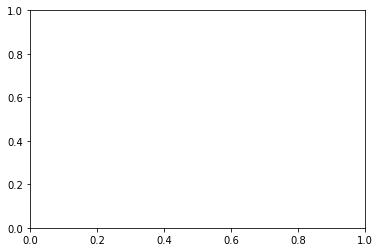

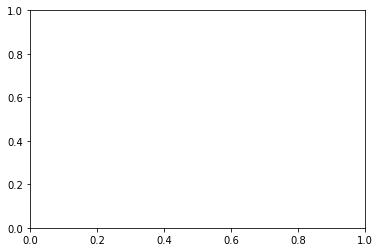

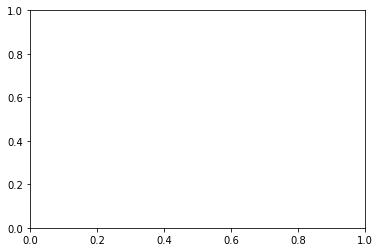

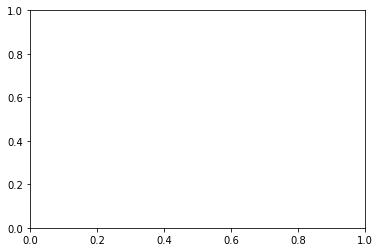

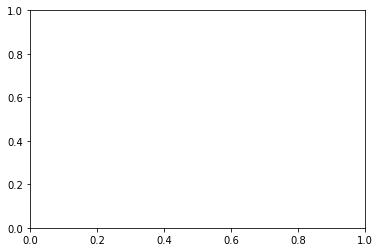

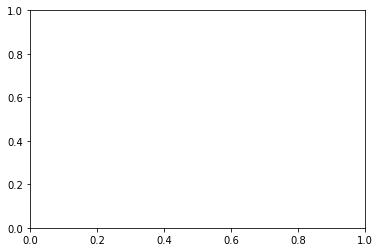

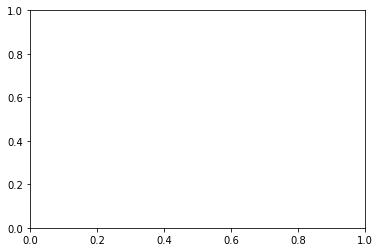

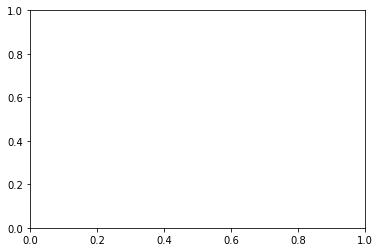

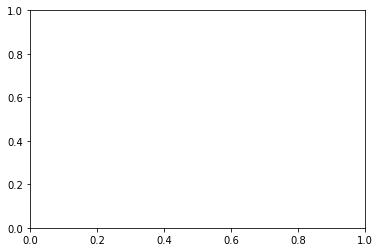

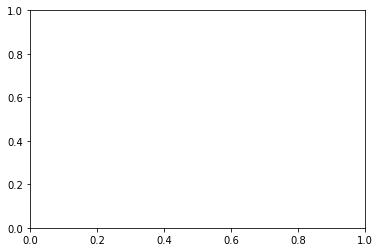

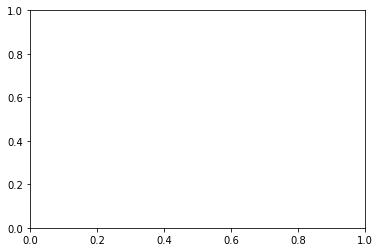

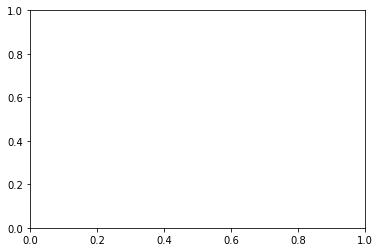

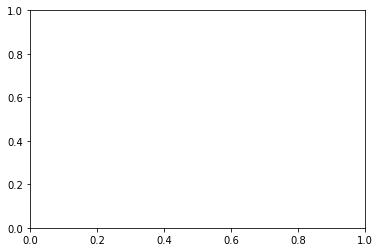

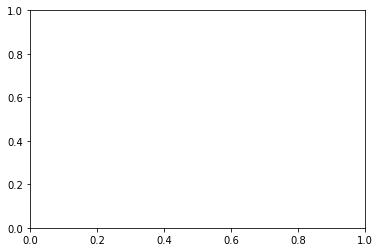

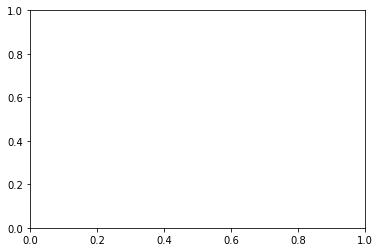

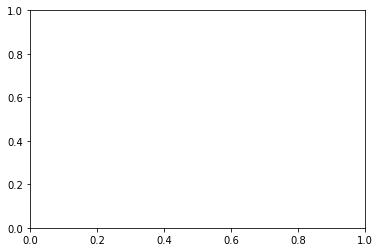

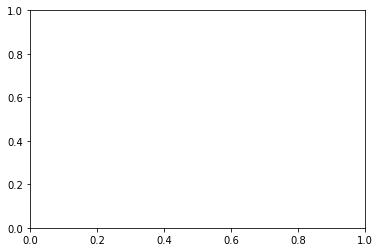

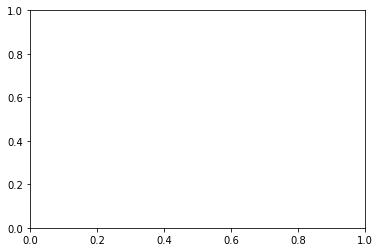

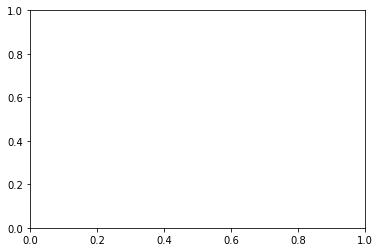

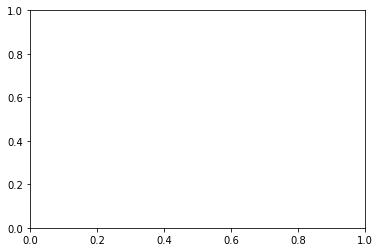

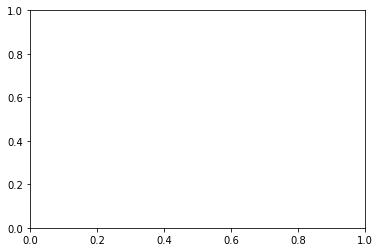

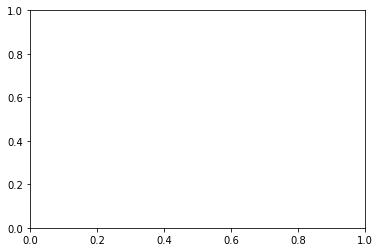

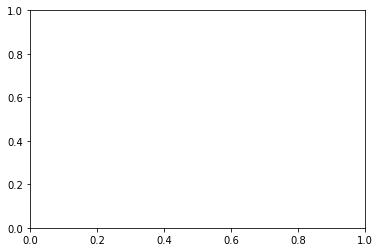

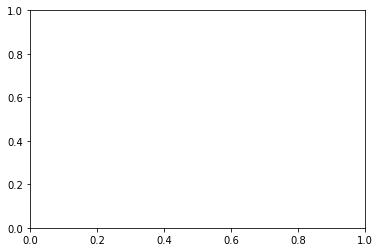

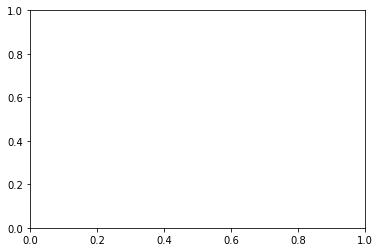

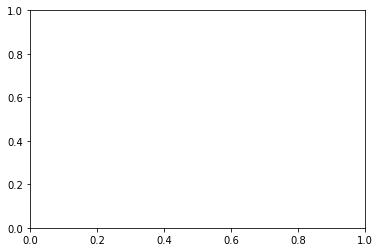

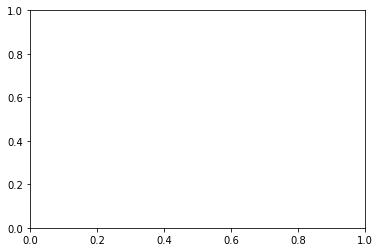

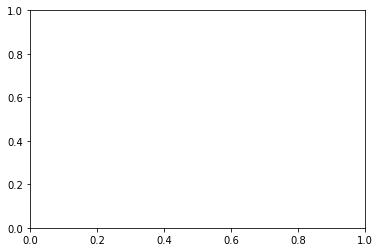

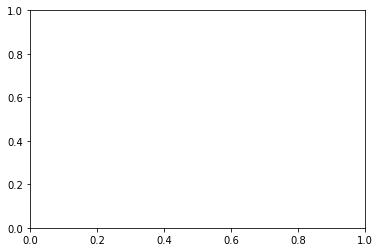

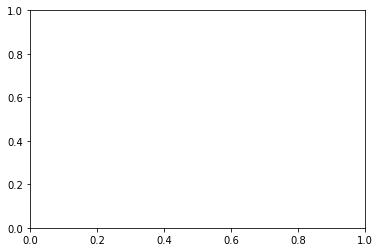

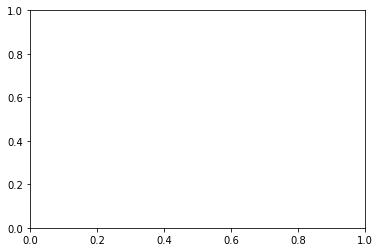

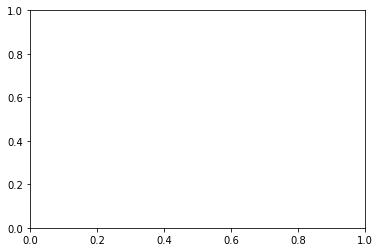

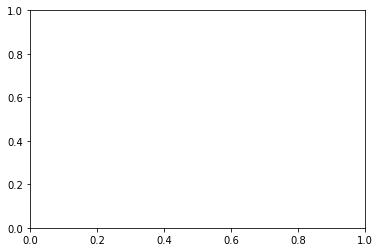

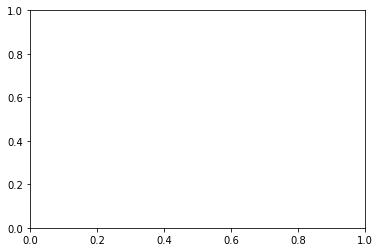

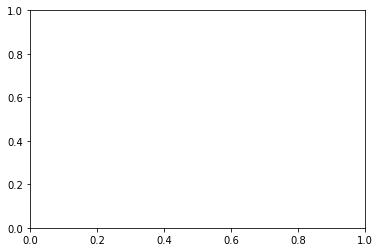

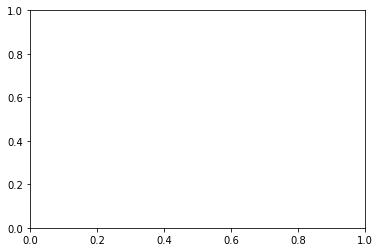

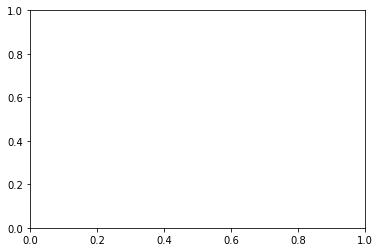

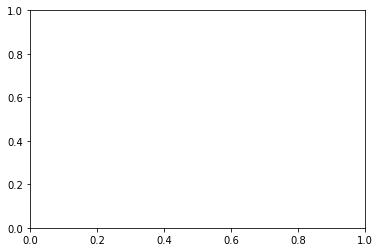

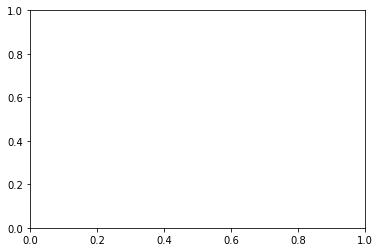

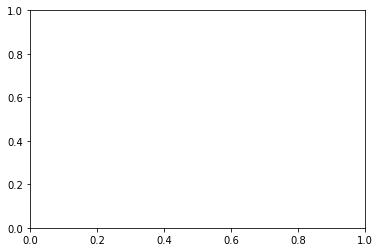

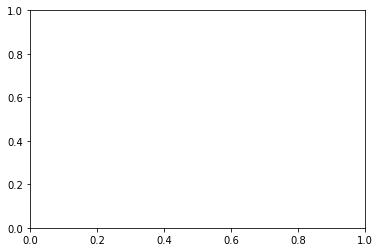

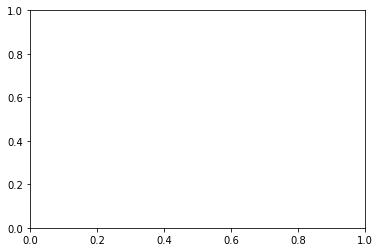

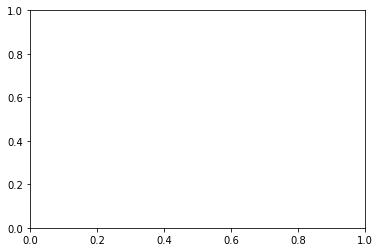

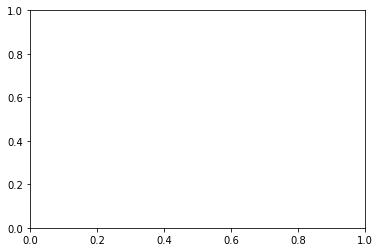

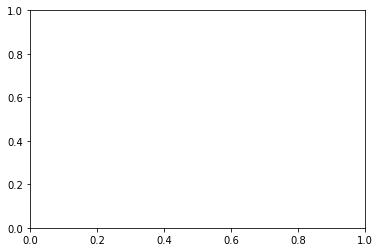

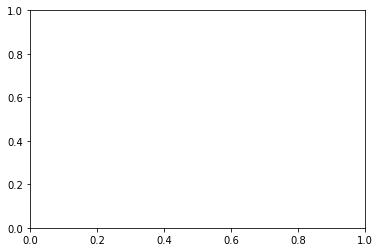

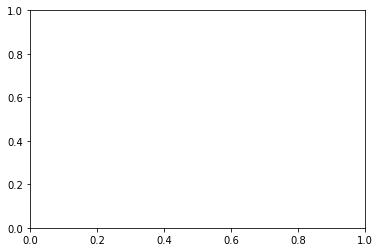

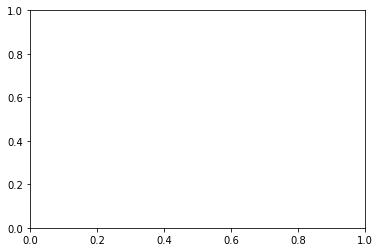

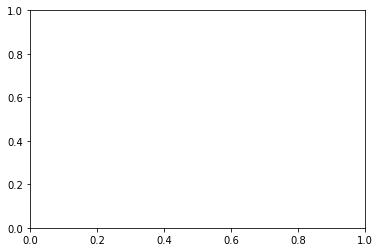

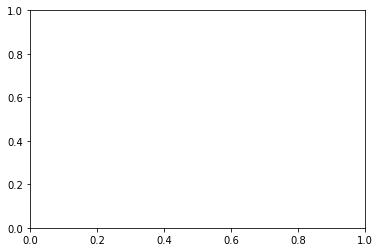

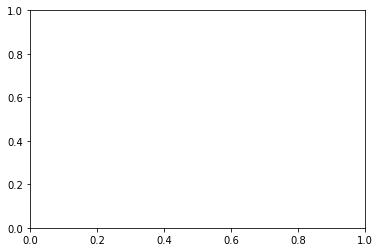

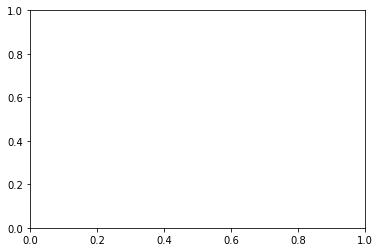

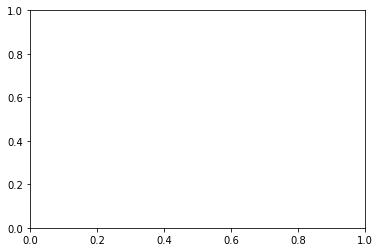

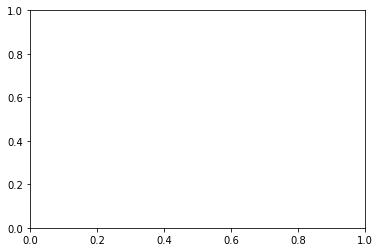

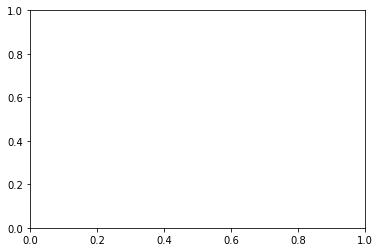

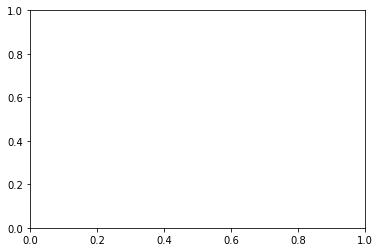

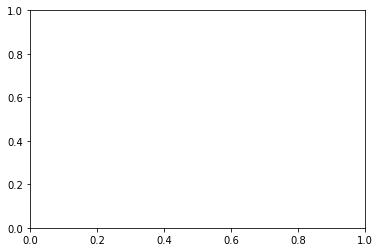

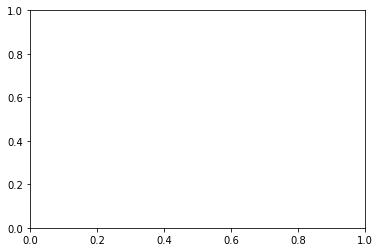

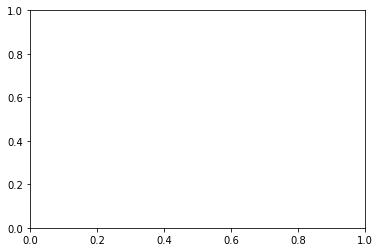

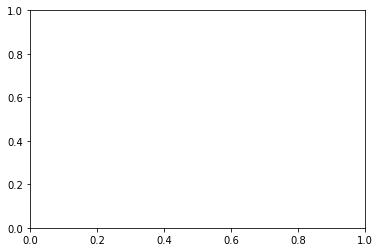

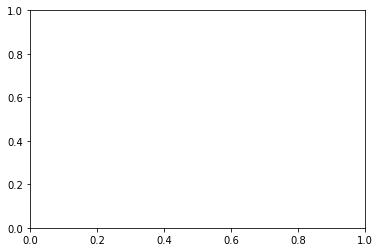

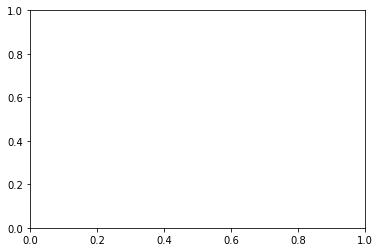

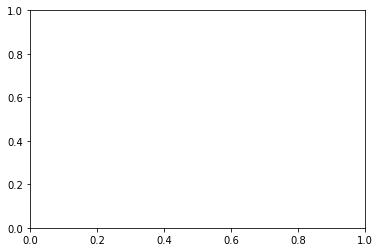

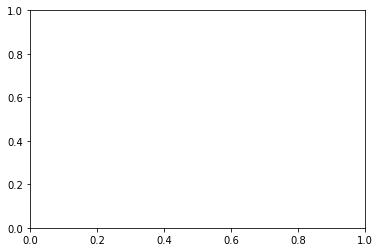

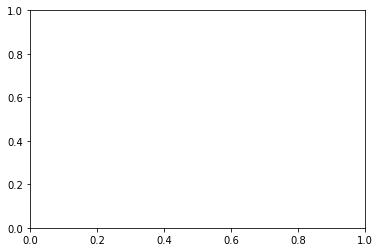

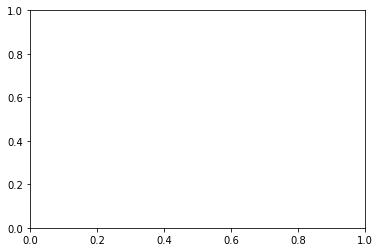

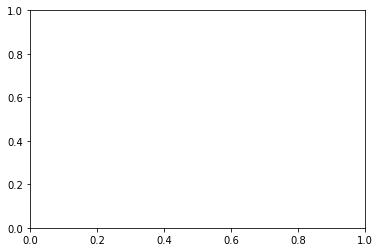

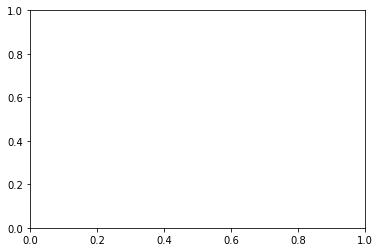

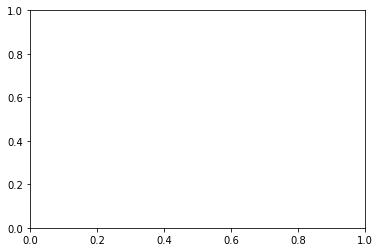

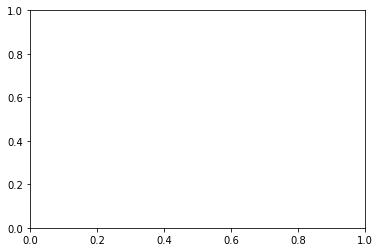

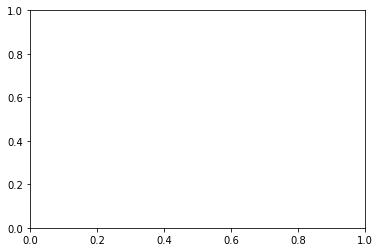

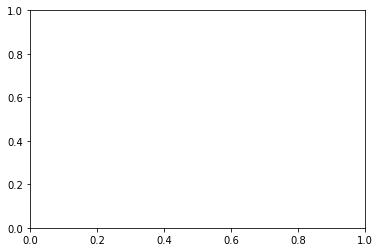

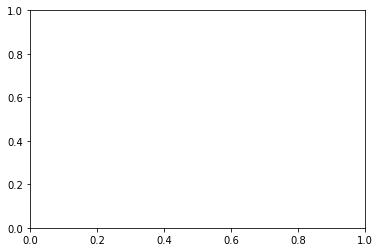

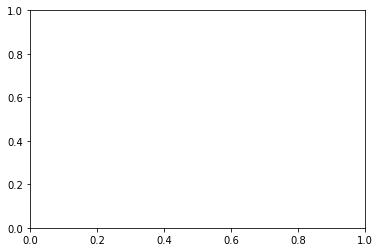

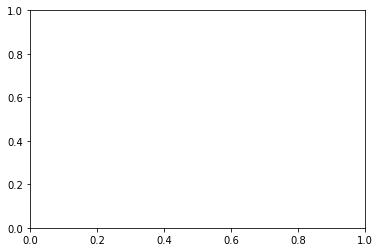

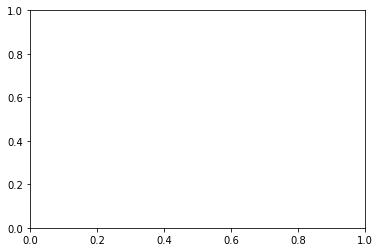

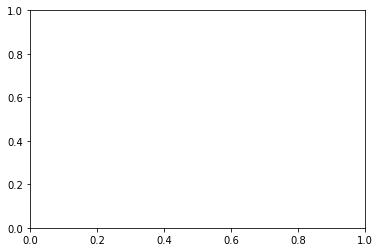

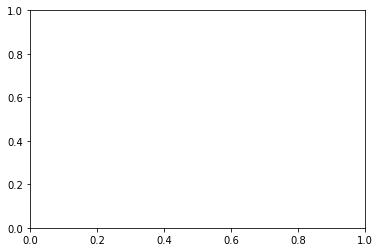

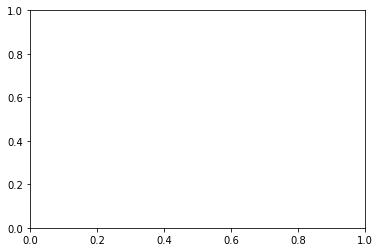

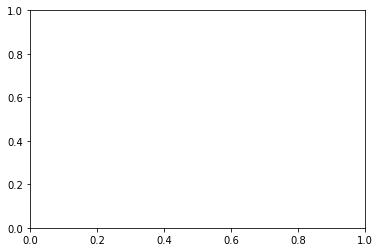

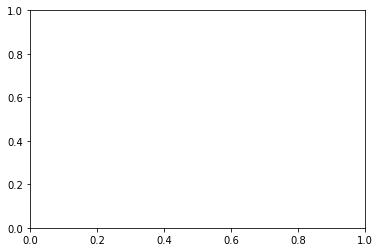

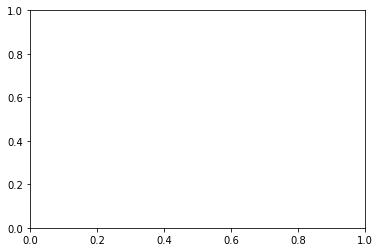

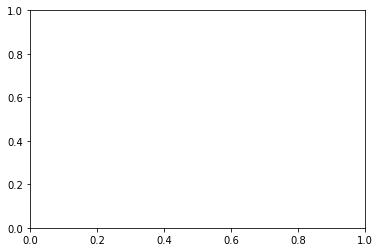

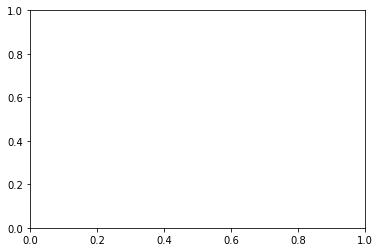

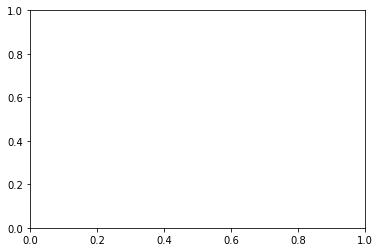

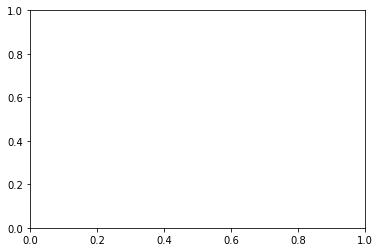

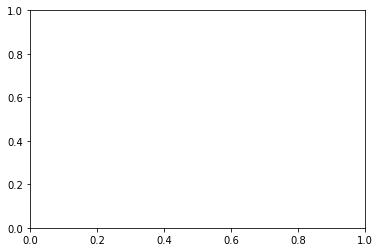

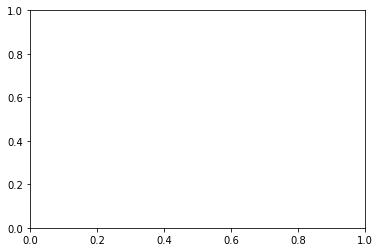

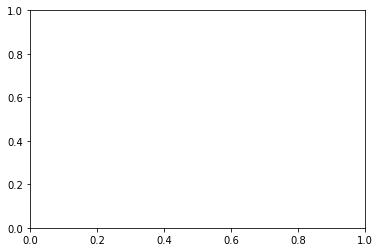

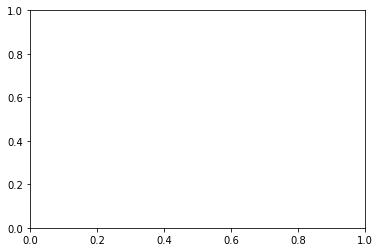

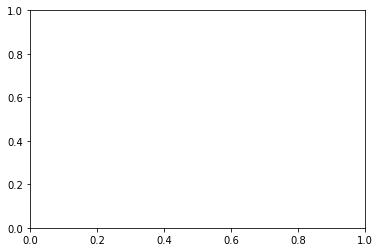

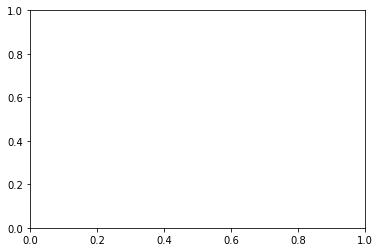

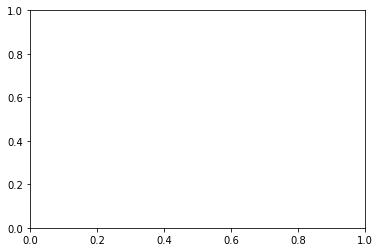

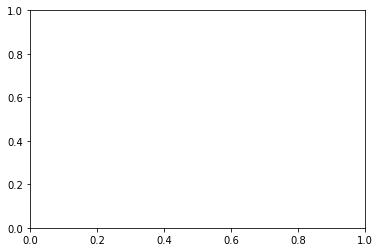

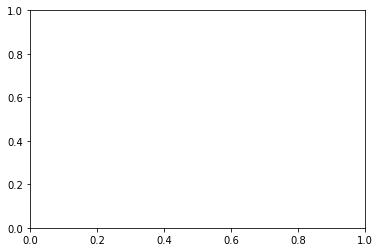

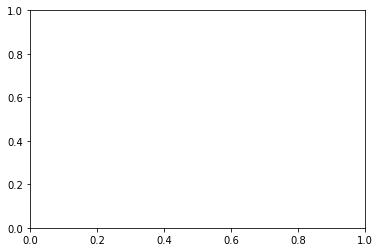

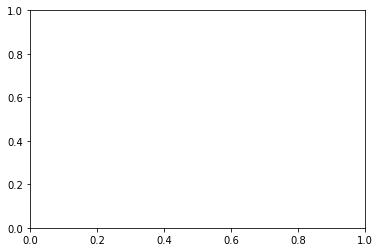

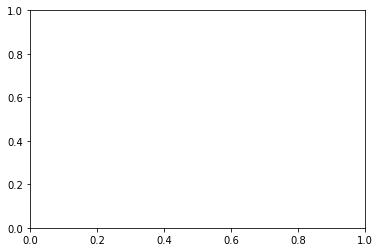

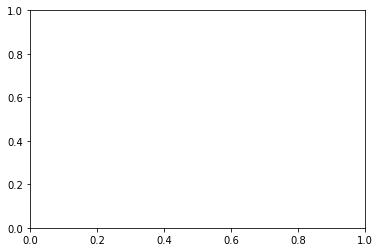

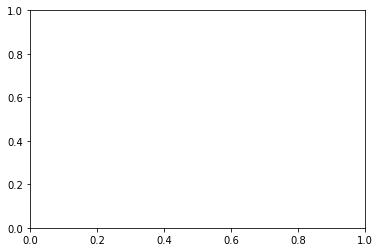

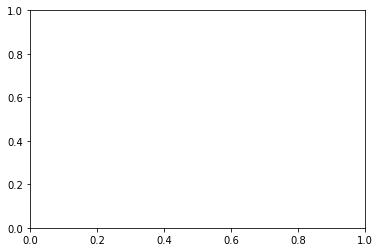

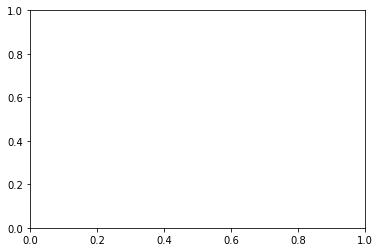

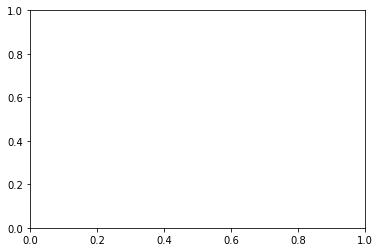

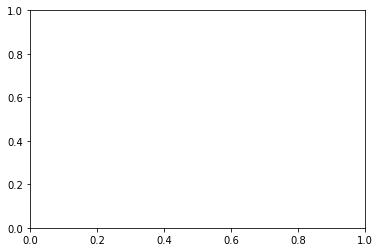

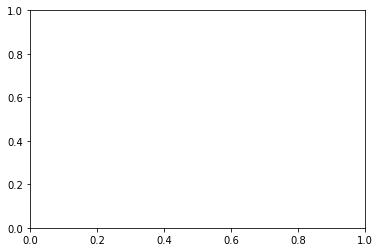

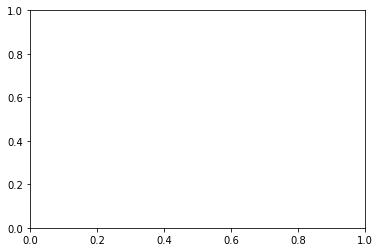

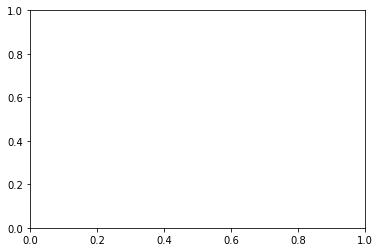

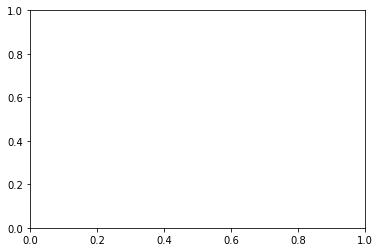

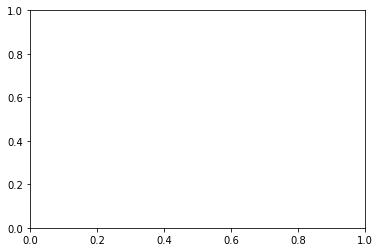

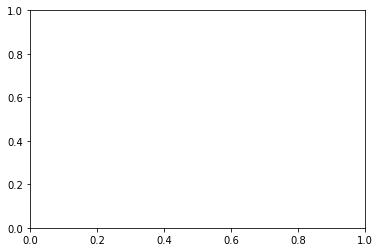

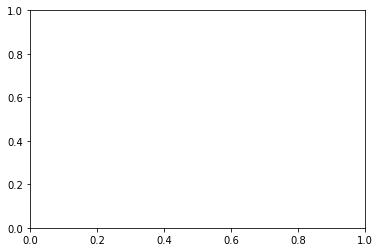

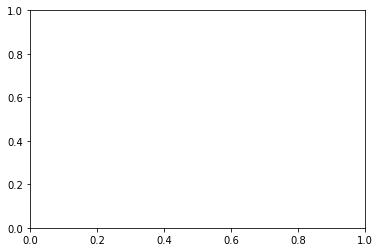

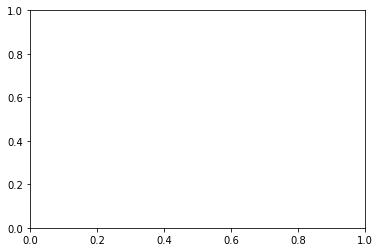

In [ ]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1
x = np.linspace(0, 1, 100)
for i in range(0,300):
    for j in range(1,4):
        fig, ax = plt.subplots(1,  1)
        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs=[ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)
        
        print(win_index)
        if win_index == 0 :
            if samples.iloc[i,j] == 1:
                init_alpha_1 += 1

            else :
                init_beta_1 += 1

        if j == 1 :
            if samples.iloc[i,j] == 1:
                init_alpha_2 += 1

            else :
                init_beta_2 += 1

            
        if j == 2 :
            if samples.iloc[i,j] == 1:
                init_alpha_3 += 1

            else :
                init_beta_3 += 1

        
        if j == 3 :
            if samples.iloc[i,j] == 1:
                init_alpha_4 += 1

            else :
                init_beta_4 += 1

                
        print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

In [13]:
Series.sort_values(samples.iloc[:100, 0:4].sum()/200, ascending=False)

Ads2    0.075
Ads4    0.065
Ads1    0.040
Ads3    0.035
dtype: float64

In [15]:
#real_ctr
Series.sort_values(samples.iloc[100:200, 0:4].sum()/100, ascending=False)


Ads2    0.18
Ads1    0.17
Ads4    0.08
Ads3    0.06
dtype: float64

### 실험결과
초기에 가중치가 작은 광고는 나중에도 선택이 잘 안되는 경우가 일부 발생함.
- 이럴 경우를 방지하기 위해 기준을 갖고(일 단위, 또는 시간 단위)로 나눠서 CTR을 측정하고 CTR에 따라 prior를 조정해 줘야 함.(기준 시점에 CTR이 높은 광고 안은 alpha 값을 올려준다. 얼마나 올려줄지?)


### 고민 해 봐야할 문제
- traffic이 100단위 도달할 때마다 CTR계산해서 prior 정보 제공하기!?
- 100단위로 끊어서 CTR 계산하는 코드 작성
- Prior을 어떻게 줄 것인가?

Summed_CTR : 일 단위로 CTR을 계산한 것  
Calculated_CTR : 톰슨 샘플링을 통해 계산된 CTR  
- 차이가 있을까?

#### summed_ctr - calculated_ctr을 해서 차이만큼 광고2번을 차이만큼의 prior을 적용해서 좀 더 노출시켜라, 
#### 광고1번은 beta prior을 늘려서 노출정도를 줄여라.

### 실험 코드

In [70]:
samples.head()

,Ads1,Ads2,Ads3,Ads4,Ads5,Ads6,Ads7,Ads8,Ads9,Ads10
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0


In [69]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

x = np.linspace(0, 1, 100)
for i in range(0,201):  
#     if i != 0 :
#         pass
#     else :
#         continue

    if (i % 100 == 0) & (i != 0) :

        CTR_of_1 = success_1/100
        CTR_of_2 = success_2/100
        CTR_of_3 = success_3/100
        CTR_of_4 = success_4/100
        print('CTR_of_ads :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
        print('Summed_Ctr - Calculated_Ctr :',
              samples.iloc[:i-cnt,0].sum()/100 -success_1/100,
              samples.iloc[:i-cnt,1].sum()/100 - success_2/100, 
              samples.iloc[:i-cnt,2].sum()/100 - success_3/100, 
              samples.iloc[:i-cnt,3].sum()/100 - success_4/100)
        cnt = i
        success_1 = success_2 = success_3 = success_4 = 0

    for j in range(1,4):
#         fig, ax = plt.subplots(1,  1)
        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs = [ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)
        
        if win_index == 0 :
            if samples.iloc[i,j] == 1:
                success_1 += 1
                init_alpha_1 += 1

            else :
                init_beta_1 += 1
                
        

#         if j == 1 :
#             if samples.iloc[i,j] == 1:
#                 success_2 += 1
#                 init_alpha_2 += 1

#             else :
#                 init_beta_2 += 1

            
#         if j == 2 :
#             if samples.iloc[i,j] == 1:
#                 success_3 += 1
#                 init_alpha_3 += 1

#             else :
#                 init_beta_3 += 1

        
#         if j == 3 :
#             if samples.iloc[i,j] == 1:
#                 success_4 += 1
#                 init_alpha_4 += 1

#             else :
#                 init_beta_4 += 1

        
        print('Checking Zeros',success_1, success_2, success_3, success_4)
#         print(success_1/100, success_2/100, success_3/100, success_4/100)

#     if i != 0 :
#         pass
#     else :
#         continue
#     if i % 100 == 0 :
#         CTR_of_1 = success_1/100
#         CTR_of_2 = success_2/100
#         CTR_of_3 = success_3/100
#         CTR_of_4 = success_4/100
#         print(CTR_of_1, CTR_of_3, CTR_of_3, CTR_of_4)
#         print('i:',i, 'inits',init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
# ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
# ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
# ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
# ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Ze

Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
CTR_of_ads : 0.01 0.18 0.06 0.08
Summed_Ctr - Calculated_Ctr : 0.07 -0.03 0.010000000000000009 0.05
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0


In [ ]:
#0.11 0.07 0.07 0.13
samples.iloc[:100, 0:4].sum()/100
# 이럴 경우에는 summed_ctr - calculated_ctr을 해서 차이만큼 광고2번을 차이만큼의 prior을 적용해서 좀 더 보여줘...광고1번은 좀 prior을 이용해서 줄여줘

In [46]:
#0.01 0.18 0.06 0.08
samples.iloc[100:200, 0:4].sum()/100

Ads1    0.17
Ads2    0.18
Ads3    0.06
Ads4    0.08
dtype: float64

### 코드 수정

In [169]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

## Prior 조정
ALPHA = 2 
BETA = 2

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

# x = np.linspace(0, 1, 100)
for i in range(0,201):  
##     if i != 0 :
##         pass
##     else :
##         continue
    
    ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
    ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
    ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
    ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
    ads_rvs = [ads_1, ads_2, ads_3, ads_4]
    max_rvs = np.max(ads_rvs)
    win_index = ads_rvs.index(max_rvs)

    print('win index?',win_index, 'i?',i)

    if win_index == 0 :
        if samples.iloc[i,win_index] == 1:
            success_1 += 1
            init_alpha_1 += 1

        else :
            init_beta_1 += 1


    if win_index == 1 :
        if samples.iloc[i,win_index] == 1:
            success_2 += 1
            init_alpha_2 += 1

        else :
            init_beta_2 += 1


    if win_index == 2 :
        if samples.iloc[i,win_index] == 1:
            success_3 += 1
            init_alpha_3 += 1

        else :
            init_beta_3 += 1


    if win_index == 3 :
        if samples.iloc[i,win_index] == 1:
            success_4 += 1
            init_alpha_4 += 1

        else :
            init_beta_4 += 1
    
    print('Click or Fail',samples.iloc[i,win_index])
    print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
#         print('Checking Zeros',success_1, success_2, success_3, success_4)
    
    
    if (i % 100 == 0) & (i != 0) :
        print('i-cnt',i-cnt)
        cnt = i
        CTR_of_1 = success_1/100
        CTR_of_2 = success_2/100
        CTR_of_3 = success_3/100
        CTR_of_4 = success_4/100
        print('Summed_Ctr :',samples.iloc[abs(100-cnt):i,0].sum()/100, samples.iloc[abs(100-cnt):i,1].sum()/100,
                             samples.iloc[abs(100-cnt):i,2].sum()/100, samples.iloc[abs(100-cnt):i,3].sum()/100)
        print('CTR_of_ads(Experiment) :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
        print('Summed_Ctr - CTR_of_ads(Experiment) :',
              round(samples.iloc[abs(100-cnt):i,0].sum()/100 - CTR_of_1, 4),
              round(samples.iloc[abs(100-cnt):i,1].sum()/100 - CTR_of_2, 4), 
              round(samples.iloc[abs(100-cnt):i,2].sum()/100 - CTR_of_3, 4), 
              round(samples.iloc[abs(100-cnt):i,3].sum()/100 - CTR_of_4, 4))
 
#         print('whatisit',samples.iloc[abs(100-cnt):i,0].sum()/100, 
#               samples.iloc[abs(100-cnt):i,1].sum()/100, 
#               samples.iloc[abs(100-cnt):i,2].sum()/100, 
#               samples.iloc[abs(100-cnt):i,3].sum()/100)
        success_1 = success_2 = success_3 = success_4 = 0

#summed에서의 최대 CTR나오는 광고안의 index
lsts = [samples.iloc[abs(100-cnt):i,0].sum()/100, 
          samples.iloc[abs(100-cnt):i,1].sum()/100,
          samples.iloc[abs(100-cnt):i,2].sum()/100, 
          samples.iloc[abs(100-cnt):i,3].sum()/100]
summed_max_ctr = np.max(lsts)
summed_max_ctr_idx = lsts.index(summed_max_ctr)
summed_max_ctr_idx    

#experiment에서의 최대 CTR나오는 광고안의 index
exp_lsts = [CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4]
exp_max_ctr = np.max([CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4])

exp_max_ctr_idx = exp_lsts.index(exp_max_ctr)
exp_max_ctr_idx


if summed_max_ctr_idx == exp_max_ctr_idx :
    print('CORRECT!!!')
else :
    print('WRONG')



#     for j in range(1,4):
#         fig, ax = plt.subplots(1,  1)
        

#     if i != 0 :
#         pass
#     else :
#         continue
#     if i % 100 == 0 :
#         CTR_of_1 = success_1/100
#         CTR_of_2 = success_2/100
#         CTR_of_3 = success_3/100
#         CTR_of_4 = success_4/100
#         print(CTR_of_1, CTR_of_3, CTR_of_3, CTR_of_4)
#         print('i:',i, 'inits',init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
# ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
# ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
# ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
# ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

win index? 1 i? 0
Click or Fail 0
1 1 1 1
win index? 0 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 3 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 1 i? 5
Click or Fail 0
1 1 1 1
win index? 1 i? 6
Click or Fail 1
1 2 1 1
win index? 1 i? 7
Click or Fail 0
1 2 1 1
win index? 2 i? 8
Click or Fail 1
1 2 2 1
win index? 2 i? 9
Click or Fail 0
1 2 2 1
win index? 2 i? 10
Click or Fail 0
1 2 2 1
win index? 2 i? 11
Click or Fail 0
1 2 2 1
win index? 2 i? 12
Click or Fail 0
1 2 2 1
win index? 3 i? 13
Click or Fail 0
1 2 2 1
win index? 3 i? 14
Click or Fail 0
1 2 2 1
win index? 0 i? 15
Click or Fail 0
1 2 2 1
win index? 3 i? 16
Click or Fail 0
1 2 2 1
win index? 3 i? 17
Click or Fail 0
1 2 2 1
win index? 1 i? 18
Click or Fail 0
1 2 2 1
win index? 1 i? 19
Click or Fail 1
1 3 2 1
win index? 1 i? 20
Click or Fail 0
1 3 2 1
win index? 2 i? 21
Click or Fail 0
1 3 2 1
win index? 2 i? 22
Click or Fail 0
1 3 2 1
win index? 0 i? 23
Cl

In [174]:
samples.iloc[:100, :4].sum()/100

Ads1    0.08
Ads2    0.15
Ads3    0.07
Ads4    0.13
dtype: float64

In [173]:
samples.iloc[100:200, :4].sum()/100

Ads1    0.08
Ads2    0.15
Ads3    0.07
Ads4    0.13
dtype: float64

### 데이터를 확인해보니 광고가 동시에 노출되는 경우가 있는 것으로 보임
- 일단 무시하고 진행? (그럼 summed_ctr과 experiment_ctr의 범위가 달라지지 않나?)
- 그냥 success count를 2로 줘볼까?
- CTR값의 차이를 통한 가중치의 조정?  
    - -CTR값이 나오면 Experiment CTR이 훨씬 높은 것이므로, beta를 조금 추가해준다. +CTR이 나오면 Summed_CTR, 즉 모수와 비슷한 CTR에 못미치는 것이므로 alpha를 추가해준다.

## Thompson Sampling Accuracy Experiment -01
####  실제 CTR으로 최고의 광고 대안과 Thompson Sampling으로 찾은 최고의 광고 대안이 일치하는 지 알아보는 실험(정말 잘 찾을까?)

In [171]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

## Prior 조정
ALPHA = 2 
BETA = 2

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

exp_success_cnt = 0
exp_cnt = 100

for k in range(0,exp_cnt):
    # x = np.linspace(0, 1, 100)
    for i in range(0,201):  
    ##     if i != 0 :
    ##         pass
    ##     else :
    ##         continue

        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs = [ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)

        print('win index?',win_index, 'i?',i)

        if win_index == 0 :
            if samples.iloc[i,win_index] == 1:
                success_1 += 1
                init_alpha_1 += 1

            else :
                init_beta_1 += 1


        if win_index == 1 :
            if samples.iloc[i,win_index] == 1:
                success_2 += 1
                init_alpha_2 += 1

            else :
                init_beta_2 += 1


        if win_index == 2 :
            if samples.iloc[i,win_index] == 1:
                success_3 += 1
                init_alpha_3 += 1

            else :
                init_beta_3 += 1


        if win_index == 3 :
            if samples.iloc[i,win_index] == 1:
                success_4 += 1
                init_alpha_4 += 1

            else :
                init_beta_4 += 1

        print('Click or Fail',samples.iloc[i,win_index])
        print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
    #         print('Checking Zeros',success_1, success_2, success_3, success_4)


        if (i % 100 == 0) & (i != 0) :
            print('i-cnt',i-cnt)
            cnt = i
            CTR_of_1 = success_1/100
            CTR_of_2 = success_2/100
            CTR_of_3 = success_3/100
            CTR_of_4 = success_4/100
            print('Summed_Ctr :',samples.iloc[abs(100-cnt):i,0].sum()/100, samples.iloc[abs(100-cnt):i,1].sum()/100,
                                 samples.iloc[abs(100-cnt):i,2].sum()/100, samples.iloc[abs(100-cnt):i,3].sum()/100)
            print('CTR_of_ads(Experiment) :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
            print('Summed_Ctr - CTR_of_ads(Experiment) :',
                  round(samples.iloc[abs(100-cnt):i,0].sum()/100 - CTR_of_1, 4),
                  round(samples.iloc[abs(100-cnt):i,1].sum()/100 - CTR_of_2, 4), 
                  round(samples.iloc[abs(100-cnt):i,2].sum()/100 - CTR_of_3, 4), 
                  round(samples.iloc[abs(100-cnt):i,3].sum()/100 - CTR_of_4, 4))

    #         print('whatisit',samples.iloc[abs(100-cnt):i,0].sum()/100, 
    #               samples.iloc[abs(100-cnt):i,1].sum()/100, 
    #               samples.iloc[abs(100-cnt):i,2].sum()/100, 
    #               samples.iloc[abs(100-cnt):i,3].sum()/100)
            success_1 = success_2 = success_3 = success_4 = 0

    #summed에서의 최대 CTR나오는 광고안의 index
    lsts = [samples.iloc[abs(100-cnt):i,0].sum()/100, 
              samples.iloc[abs(100-cnt):i,1].sum()/100,
              samples.iloc[abs(100-cnt):i,2].sum()/100, 
              samples.iloc[abs(100-cnt):i,3].sum()/100]
    summed_max_ctr = np.max(lsts)
    summed_max_ctr_idx = lsts.index(summed_max_ctr)
    summed_max_ctr_idx    

    #experiment에서의 최대 CTR나오는 광고안의 index
    exp_lsts = [CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4]
    exp_max_ctr = np.max([CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4])

    exp_max_ctr_idx = exp_lsts.index(exp_max_ctr)
    exp_max_ctr_idx


    if summed_max_ctr_idx == exp_max_ctr_idx :
        print('CORRECT!!!')
        exp_success_cnt += 1
    else :
        print('WRONG')

print('Accuracy of Thompson Sampling :',exp_success_cnt/exp_cnt)


    #     for j in range(1,4):
    #         fig, ax = plt.subplots(1,  1)


    #     if i != 0 :
    #         pass
    #     else :
    #         continue
    #     if i % 100 == 0 :
    #         CTR_of_1 = success_1/100
    #         CTR_of_2 = success_2/100
    #         CTR_of_3 = success_3/100
    #         CTR_of_4 = success_4/100
    #         print(CTR_of_1, CTR_of_3, CTR_of_3, CTR_of_4)
    #         print('i:',i, 'inits',init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
    # ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
    # ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
    # ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
    # ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')


win index? 3 i? 0
Click or Fail 0
1 1 1 1
win index? 2 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 0 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 1 i? 5
Click or Fail 0
1 1 1 1
win index? 1 i? 6
Click or Fail 1
1 2 1 1
win index? 1 i? 7
Click or Fail 0
1 2 1 1
win index? 2 i? 8
Click or Fail 1
1 2 2 1
win index? 3 i? 9
Click or Fail 0
1 2 2 1
win index? 1 i? 10
Click or Fail 0
1 2 2 1
win index? 0 i? 11
Click or Fail 0
1 2 2 1
win index? 0 i? 12
Click or Fail 0
1 2 2 1
win index? 2 i? 13
Click or Fail 0
1 2 2 1
win index? 1 i? 14
Click or Fail 0
1 2 2 1
win index? 2 i? 15
Click or Fail 0
1 2 2 1
win index? 2 i? 16
Click or Fail 0
1 2 2 1
win index? 3 i? 17
Click or Fail 0
1 2 2 1
win index? 1 i? 18
Click or Fail 0
1 2 2 1
win index? 0 i? 19
Click or Fail 0
1 2 2 1
win index? 2 i? 20
Click or Fail 0
1 2 2 1
win index? 1 i? 21
Click or Fail 0
1 2 2 1
win index? 3 i? 22
Click or Fail 0
1 2 2 1
win index? 2 i? 23
Cl

win index? 1 i? 137
Click or Fail 0
1 39 5 1
win index? 1 i? 138
Click or Fail 0
1 39 5 1
win index? 1 i? 139
Click or Fail 1
1 40 5 1
win index? 1 i? 140
Click or Fail 0
1 40 5 1
win index? 1 i? 141
Click or Fail 1
1 41 5 1
win index? 1 i? 142
Click or Fail 1
1 42 5 1
win index? 1 i? 143
Click or Fail 0
1 42 5 1
win index? 1 i? 144
Click or Fail 0
1 42 5 1
win index? 1 i? 145
Click or Fail 0
1 42 5 1
win index? 1 i? 146
Click or Fail 0
1 42 5 1
win index? 1 i? 147
Click or Fail 0
1 42 5 1
win index? 1 i? 148
Click or Fail 1
1 43 5 1
win index? 1 i? 149
Click or Fail 0
1 43 5 1
win index? 1 i? 150
Click or Fail 1
1 44 5 1
win index? 1 i? 151
Click or Fail 0
1 44 5 1
win index? 1 i? 152
Click or Fail 0
1 44 5 1
win index? 1 i? 153
Click or Fail 1
1 45 5 1
win index? 1 i? 154
Click or Fail 1
1 46 5 1
win index? 2 i? 155
Click or Fail 0
1 46 5 1
win index? 1 i? 156
Click or Fail 0
1 46 5 1
win index? 1 i? 157
Click or Fail 0
1 46 5 1
win index? 1 i? 158
Click or Fail 0
1 46 5 1
win index?

1 67 5 1
win index? 1 i? 117
Click or Fail 1
1 68 5 1
win index? 1 i? 118
Click or Fail 1
1 69 5 1
win index? 1 i? 119
Click or Fail 0
1 69 5 1
win index? 1 i? 120
Click or Fail 1
1 70 5 1
win index? 2 i? 121
Click or Fail 0
1 70 5 1
win index? 1 i? 122
Click or Fail 0
1 70 5 1
win index? 1 i? 123
Click or Fail 0
1 70 5 1
win index? 1 i? 124
Click or Fail 0
1 70 5 1
win index? 1 i? 125
Click or Fail 0
1 70 5 1
win index? 1 i? 126
Click or Fail 0
1 70 5 1
win index? 1 i? 127
Click or Fail 0
1 70 5 1
win index? 1 i? 128
Click or Fail 0
1 70 5 1
win index? 1 i? 129
Click or Fail 0
1 70 5 1
win index? 1 i? 130
Click or Fail 1
1 71 5 1
win index? 1 i? 131
Click or Fail 0
1 71 5 1
win index? 1 i? 132
Click or Fail 0
1 71 5 1
win index? 1 i? 133
Click or Fail 0
1 71 5 1
win index? 1 i? 134
Click or Fail 0
1 71 5 1
win index? 1 i? 135
Click or Fail 0
1 71 5 1
win index? 1 i? 136
Click or Fail 0
1 71 5 1
win index? 1 i? 137
Click or Fail 0
1 71 5 1
win index? 0 i? 138
Click or Fail 0
1 71 5 1
w

win index? 1 i? 19
Click or Fail 1
1 116 5 3
win index? 1 i? 20
Click or Fail 0
1 116 5 3
win index? 1 i? 21
Click or Fail 0
1 116 5 3
win index? 1 i? 22
Click or Fail 0
1 116 5 3
win index? 1 i? 23
Click or Fail 0
1 116 5 3
win index? 3 i? 24
Click or Fail 0
1 116 5 3
win index? 1 i? 25
Click or Fail 1
1 117 5 3
win index? 1 i? 26
Click or Fail 1
1 118 5 3
win index? 1 i? 27
Click or Fail 0
1 118 5 3
win index? 1 i? 28
Click or Fail 0
1 118 5 3
win index? 1 i? 29
Click or Fail 0
1 118 5 3
win index? 1 i? 30
Click or Fail 0
1 118 5 3
win index? 1 i? 31
Click or Fail 0
1 118 5 3
win index? 1 i? 32
Click or Fail 0
1 118 5 3
win index? 1 i? 33
Click or Fail 0
1 118 5 3
win index? 1 i? 34
Click or Fail 0
1 118 5 3
win index? 1 i? 35
Click or Fail 0
1 118 5 3
win index? 1 i? 36
Click or Fail 0
1 118 5 3
win index? 1 i? 37
Click or Fail 0
1 118 5 3
win index? 1 i? 38
Click or Fail 0
1 118 5 3
win index? 1 i? 39
Click or Fail 0
1 118 5 3
win index? 1 i? 40
Click or Fail 0
1 118 5 3
win index?

win index? 1 i? 148
Click or Fail 1
1 171 5 3
win index? 1 i? 149
Click or Fail 0
1 171 5 3
win index? 1 i? 150
Click or Fail 1
1 172 5 3
win index? 1 i? 151
Click or Fail 0
1 172 5 3
win index? 1 i? 152
Click or Fail 0
1 172 5 3
win index? 1 i? 153
Click or Fail 1
1 173 5 3
win index? 1 i? 154
Click or Fail 1
1 174 5 3
win index? 1 i? 155
Click or Fail 0
1 174 5 3
win index? 1 i? 156
Click or Fail 0
1 174 5 3
win index? 1 i? 157
Click or Fail 0
1 174 5 3
win index? 1 i? 158
Click or Fail 0
1 174 5 3
win index? 1 i? 159
Click or Fail 0
1 174 5 3
win index? 1 i? 160
Click or Fail 0
1 174 5 3
win index? 1 i? 161
Click or Fail 0
1 174 5 3
win index? 1 i? 162
Click or Fail 0
1 174 5 3
win index? 1 i? 163
Click or Fail 0
1 174 5 3
win index? 0 i? 164
Click or Fail 0
1 174 5 3
win index? 1 i? 165
Click or Fail 0
1 174 5 3
win index? 1 i? 166
Click or Fail 0
1 174 5 3
win index? 1 i? 167
Click or Fail 0
1 174 5 3
win index? 1 i? 168
Click or Fail 0
1 174 5 3
win index? 1 i? 169
Click or Fail 

win index? 1 i? 125
Click or Fail 0
1 197 5 3
win index? 1 i? 126
Click or Fail 0
1 197 5 3
win index? 1 i? 127
Click or Fail 0
1 197 5 3
win index? 1 i? 128
Click or Fail 0
1 197 5 3
win index? 1 i? 129
Click or Fail 0
1 197 5 3
win index? 1 i? 130
Click or Fail 1
1 198 5 3
win index? 1 i? 131
Click or Fail 0
1 198 5 3
win index? 1 i? 132
Click or Fail 0
1 198 5 3
win index? 1 i? 133
Click or Fail 0
1 198 5 3
win index? 1 i? 134
Click or Fail 0
1 198 5 3
win index? 1 i? 135
Click or Fail 0
1 198 5 3
win index? 1 i? 136
Click or Fail 0
1 198 5 3
win index? 1 i? 137
Click or Fail 0
1 198 5 3
win index? 1 i? 138
Click or Fail 0
1 198 5 3
win index? 1 i? 139
Click or Fail 1
1 199 5 3
win index? 1 i? 140
Click or Fail 0
1 199 5 3
win index? 1 i? 141
Click or Fail 1
1 200 5 3
win index? 1 i? 142
Click or Fail 1
1 201 5 3
win index? 1 i? 143
Click or Fail 0
1 201 5 3
win index? 1 i? 144
Click or Fail 0
1 201 5 3
win index? 1 i? 145
Click or Fail 0
1 201 5 3
win index? 1 i? 146
Click or Fail 

win index? 1 i? 114
Click or Fail 0
1 225 5 4
win index? 1 i? 115
Click or Fail 0
1 225 5 4
win index? 1 i? 116
Click or Fail 0
1 225 5 4
win index? 1 i? 117
Click or Fail 1
1 226 5 4
win index? 1 i? 118
Click or Fail 1
1 227 5 4
win index? 1 i? 119
Click or Fail 0
1 227 5 4
win index? 1 i? 120
Click or Fail 1
1 228 5 4
win index? 1 i? 121
Click or Fail 0
1 228 5 4
win index? 1 i? 122
Click or Fail 0
1 228 5 4
win index? 1 i? 123
Click or Fail 0
1 228 5 4
win index? 1 i? 124
Click or Fail 0
1 228 5 4
win index? 1 i? 125
Click or Fail 0
1 228 5 4
win index? 1 i? 126
Click or Fail 0
1 228 5 4
win index? 1 i? 127
Click or Fail 0
1 228 5 4
win index? 1 i? 128
Click or Fail 0
1 228 5 4
win index? 1 i? 129
Click or Fail 0
1 228 5 4
win index? 1 i? 130
Click or Fail 1
1 229 5 4
win index? 1 i? 131
Click or Fail 0
1 229 5 4
win index? 1 i? 132
Click or Fail 0
1 229 5 4
win index? 1 i? 133
Click or Fail 0
1 229 5 4
win index? 1 i? 134
Click or Fail 0
1 229 5 4
win index? 1 i? 135
Click or Fail 

win index? 3 i? 100
Click or Fail 0
1 253 5 5
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
1 253 5 5
win index? 1 i? 102
Click or Fail 0
1 253 5 5
win index? 1 i? 103
Click or Fail 1
1 254 5 5
win index? 1 i? 104
Click or Fail 1
1 255 5 5
win index? 1 i? 105
Click or Fail 0
1 255 5 5
win index? 1 i? 106
Click or Fail 0
1 255 5 5
win index? 1 i? 107
Click or Fail 0
1 255 5 5
win index? 1 i? 108
Click or Fail 0
1 255 5 5
win index? 1 i? 109
Click or Fail 1
1 256 5 5
win index? 1 i? 110
Click or Fail 1
1 257 5 5
win index? 3 i? 111
Click or Fail 0
1 257 5 5
win index? 1 i? 112
Click or Fail 0
1 257 5 5
win index? 1 i? 113
Click or Fail 0
1 257 5 5
win index? 1 i? 114
Click or Fail 0
1 257 5 5
win index? 1 i? 115
Click or Fail 0
1 257 5 5
win index? 1 i? 116
Click or Fail 0
1 257 5 5
win index? 1 i? 117
Click or Fail 1
1 258 5 5
win index? 1 i? 118
Click or 

win index? 1 i? 86
Click or Fail 0
1 284 5 5
win index? 1 i? 87
Click or Fail 0
1 284 5 5
win index? 1 i? 88
Click or Fail 0
1 284 5 5
win index? 1 i? 89
Click or Fail 0
1 284 5 5
win index? 1 i? 90
Click or Fail 0
1 284 5 5
win index? 1 i? 91
Click or Fail 0
1 284 5 5
win index? 1 i? 92
Click or Fail 0
1 284 5 5
win index? 1 i? 93
Click or Fail 0
1 284 5 5
win index? 1 i? 94
Click or Fail 0
1 284 5 5
win index? 1 i? 95
Click or Fail 1
1 285 5 5
win index? 1 i? 96
Click or Fail 0
1 285 5 5
win index? 1 i? 97
Click or Fail 0
1 285 5 5
win index? 1 i? 98
Click or Fail 0
1 285 5 5
win index? 1 i? 99
Click or Fail 0
1 285 5 5
win index? 1 i? 100
Click or Fail 0
1 285 5 5
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.14 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.01 0.07 0.13
win index? 1 i? 101
Click or Fail 0
1 285 5 5
win index? 1 i? 102
Click or Fail 0
1 285 5 5
win index? 1 i? 103
Click or Fail 1
1 286 5 5
win index? 1 i? 104
Click or Fail 1
1 287 

win index? 1 i? 70
Click or Fail 0
1 313 5 5
win index? 1 i? 71
Click or Fail 1
1 314 5 5
win index? 1 i? 72
Click or Fail 0
1 314 5 5
win index? 1 i? 73
Click or Fail 0
1 314 5 5
win index? 1 i? 74
Click or Fail 0
1 314 5 5
win index? 1 i? 75
Click or Fail 0
1 314 5 5
win index? 1 i? 76
Click or Fail 0
1 314 5 5
win index? 1 i? 77
Click or Fail 1
1 315 5 5
win index? 1 i? 78
Click or Fail 0
1 315 5 5
win index? 1 i? 79
Click or Fail 0
1 315 5 5
win index? 1 i? 80
Click or Fail 0
1 315 5 5
win index? 1 i? 81
Click or Fail 0
1 315 5 5
win index? 1 i? 82
Click or Fail 1
1 316 5 5
win index? 1 i? 83
Click or Fail 0
1 316 5 5
win index? 1 i? 84
Click or Fail 1
1 317 5 5
win index? 1 i? 85
Click or Fail 0
1 317 5 5
win index? 1 i? 86
Click or Fail 0
1 317 5 5
win index? 1 i? 87
Click or Fail 0
1 317 5 5
win index? 1 i? 88
Click or Fail 0
1 317 5 5
win index? 1 i? 89
Click or Fail 0
1 317 5 5
win index? 1 i? 90
Click or Fail 0
1 317 5 5
win index? 1 i? 91
Click or Fail 0
1 317 5 5
win index?

win index? 1 i? 55
Click or Fail 0
1 343 5 6
win index? 1 i? 56
Click or Fail 0
1 343 5 6
win index? 1 i? 57
Click or Fail 0
1 343 5 6
win index? 1 i? 58
Click or Fail 1
1 344 5 6
win index? 1 i? 59
Click or Fail 0
1 344 5 6
win index? 1 i? 60
Click or Fail 0
1 344 5 6
win index? 1 i? 61
Click or Fail 0
1 344 5 6
win index? 1 i? 62
Click or Fail 0
1 344 5 6
win index? 1 i? 63
Click or Fail 0
1 344 5 6
win index? 1 i? 64
Click or Fail 0
1 344 5 6
win index? 1 i? 65
Click or Fail 0
1 344 5 6
win index? 1 i? 66
Click or Fail 1
1 345 5 6
win index? 1 i? 67
Click or Fail 0
1 345 5 6
win index? 1 i? 68
Click or Fail 0
1 345 5 6
win index? 1 i? 69
Click or Fail 0
1 345 5 6
win index? 1 i? 70
Click or Fail 0
1 345 5 6
win index? 1 i? 71
Click or Fail 1
1 346 5 6
win index? 1 i? 72
Click or Fail 0
1 346 5 6
win index? 1 i? 73
Click or Fail 0
1 346 5 6
win index? 1 i? 74
Click or Fail 0
1 346 5 6
win index? 1 i? 75
Click or Fail 0
1 346 5 6
win index? 1 i? 76
Click or Fail 0
1 346 5 6
win index?

win index? 1 i? 40
Click or Fail 0
1 374 5 6
win index? 1 i? 41
Click or Fail 0
1 374 5 6
win index? 1 i? 42
Click or Fail 0
1 374 5 6
win index? 1 i? 43
Click or Fail 0
1 374 5 6
win index? 1 i? 44
Click or Fail 0
1 374 5 6
win index? 1 i? 45
Click or Fail 0
1 374 5 6
win index? 1 i? 46
Click or Fail 0
1 374 5 6
win index? 1 i? 47
Click or Fail 1
1 375 5 6
win index? 1 i? 48
Click or Fail 0
1 375 5 6
win index? 1 i? 49
Click or Fail 0
1 375 5 6
win index? 1 i? 50
Click or Fail 0
1 375 5 6
win index? 1 i? 51
Click or Fail 0
1 375 5 6
win index? 1 i? 52
Click or Fail 0
1 375 5 6
win index? 1 i? 53
Click or Fail 0
1 375 5 6
win index? 1 i? 54
Click or Fail 1
1 376 5 6
win index? 1 i? 55
Click or Fail 0
1 376 5 6
win index? 1 i? 56
Click or Fail 0
1 376 5 6
win index? 1 i? 57
Click or Fail 0
1 376 5 6
win index? 2 i? 58
Click or Fail 0
1 376 5 6
win index? 1 i? 59
Click or Fail 0
1 376 5 6
win index? 1 i? 60
Click or Fail 0
1 376 5 6
win index? 1 i? 61
Click or Fail 0
1 376 5 6
win index?

win index? 1 i? 20
Click or Fail 0
1 404 5 6
win index? 1 i? 21
Click or Fail 0
1 404 5 6
win index? 1 i? 22
Click or Fail 0
1 404 5 6
win index? 1 i? 23
Click or Fail 0
1 404 5 6
win index? 1 i? 24
Click or Fail 0
1 404 5 6
win index? 1 i? 25
Click or Fail 1
1 405 5 6
win index? 1 i? 26
Click or Fail 1
1 406 5 6
win index? 1 i? 27
Click or Fail 0
1 406 5 6
win index? 1 i? 28
Click or Fail 0
1 406 5 6
win index? 1 i? 29
Click or Fail 0
1 406 5 6
win index? 1 i? 30
Click or Fail 0
1 406 5 6
win index? 1 i? 31
Click or Fail 0
1 406 5 6
win index? 1 i? 32
Click or Fail 0
1 406 5 6
win index? 1 i? 33
Click or Fail 0
1 406 5 6
win index? 1 i? 34
Click or Fail 0
1 406 5 6
win index? 1 i? 35
Click or Fail 0
1 406 5 6
win index? 1 i? 36
Click or Fail 0
1 406 5 6
win index? 1 i? 37
Click or Fail 0
1 406 5 6
win index? 1 i? 38
Click or Fail 0
1 406 5 6
win index? 1 i? 39
Click or Fail 0
1 406 5 6
win index? 1 i? 40
Click or Fail 0
1 406 5 6
win index? 1 i? 41
Click or Fail 0
1 406 5 6
win index?

win index? 1 i? 133
Click or Fail 0
1 456 5 6
win index? 1 i? 134
Click or Fail 0
1 456 5 6
win index? 1 i? 135
Click or Fail 0
1 456 5 6
win index? 1 i? 136
Click or Fail 0
1 456 5 6
win index? 1 i? 137
Click or Fail 0
1 456 5 6
win index? 1 i? 138
Click or Fail 0
1 456 5 6
win index? 1 i? 139
Click or Fail 1
1 457 5 6
win index? 1 i? 140
Click or Fail 0
1 457 5 6
win index? 3 i? 141
Click or Fail 0
1 457 5 6
win index? 1 i? 142
Click or Fail 1
1 458 5 6
win index? 1 i? 143
Click or Fail 0
1 458 5 6
win index? 1 i? 144
Click or Fail 0
1 458 5 6
win index? 1 i? 145
Click or Fail 0
1 458 5 6
win index? 1 i? 146
Click or Fail 0
1 458 5 6
win index? 1 i? 147
Click or Fail 0
1 458 5 6
win index? 1 i? 148
Click or Fail 1
1 459 5 6
win index? 1 i? 149
Click or Fail 0
1 459 5 6
win index? 1 i? 150
Click or Fail 1
1 460 5 6
win index? 3 i? 151
Click or Fail 0
1 460 5 6
win index? 1 i? 152
Click or Fail 0
1 460 5 6
win index? 1 i? 153
Click or Fail 1
1 461 5 6
win index? 1 i? 154
Click or Fail 

win index? 1 i? 115
Click or Fail 0
1 483 5 6
win index? 1 i? 116
Click or Fail 0
1 483 5 6
win index? 1 i? 117
Click or Fail 1
1 484 5 6
win index? 1 i? 118
Click or Fail 1
1 485 5 6
win index? 1 i? 119
Click or Fail 0
1 485 5 6
win index? 1 i? 120
Click or Fail 1
1 486 5 6
win index? 1 i? 121
Click or Fail 0
1 486 5 6
win index? 1 i? 122
Click or Fail 0
1 486 5 6
win index? 1 i? 123
Click or Fail 0
1 486 5 6
win index? 1 i? 124
Click or Fail 0
1 486 5 6
win index? 1 i? 125
Click or Fail 0
1 486 5 6
win index? 1 i? 126
Click or Fail 0
1 486 5 6
win index? 1 i? 127
Click or Fail 0
1 486 5 6
win index? 1 i? 128
Click or Fail 0
1 486 5 6
win index? 1 i? 129
Click or Fail 0
1 486 5 6
win index? 1 i? 130
Click or Fail 1
1 487 5 6
win index? 1 i? 131
Click or Fail 0
1 487 5 6
win index? 1 i? 132
Click or Fail 0
1 487 5 6
win index? 1 i? 133
Click or Fail 0
1 487 5 6
win index? 1 i? 134
Click or Fail 0
1 487 5 6
win index? 1 i? 135
Click or Fail 0
1 487 5 6
win index? 1 i? 136
Click or Fail 

win index? 1 i? 55
Click or Fail 0
1 537 5 6
win index? 1 i? 56
Click or Fail 0
1 537 5 6
win index? 1 i? 57
Click or Fail 0
1 537 5 6
win index? 1 i? 58
Click or Fail 1
1 538 5 6
win index? 1 i? 59
Click or Fail 0
1 538 5 6
win index? 1 i? 60
Click or Fail 0
1 538 5 6
win index? 1 i? 61
Click or Fail 0
1 538 5 6
win index? 1 i? 62
Click or Fail 0
1 538 5 6
win index? 1 i? 63
Click or Fail 0
1 538 5 6
win index? 1 i? 64
Click or Fail 0
1 538 5 6
win index? 1 i? 65
Click or Fail 0
1 538 5 6
win index? 1 i? 66
Click or Fail 1
1 539 5 6
win index? 1 i? 67
Click or Fail 0
1 539 5 6
win index? 1 i? 68
Click or Fail 0
1 539 5 6
win index? 1 i? 69
Click or Fail 0
1 539 5 6
win index? 1 i? 70
Click or Fail 0
1 539 5 6
win index? 0 i? 71
Click or Fail 0
1 539 5 6
win index? 1 i? 72
Click or Fail 0
1 539 5 6
win index? 1 i? 73
Click or Fail 0
1 539 5 6
win index? 1 i? 74
Click or Fail 0
1 539 5 6
win index? 1 i? 75
Click or Fail 0
1 539 5 6
win index? 1 i? 76
Click or Fail 0
1 539 5 6
win index?

win index? 1 i? 32
Click or Fail 0
1 567 5 6
win index? 1 i? 33
Click or Fail 0
1 567 5 6
win index? 1 i? 34
Click or Fail 0
1 567 5 6
win index? 1 i? 35
Click or Fail 0
1 567 5 6
win index? 1 i? 36
Click or Fail 0
1 567 5 6
win index? 1 i? 37
Click or Fail 0
1 567 5 6
win index? 1 i? 38
Click or Fail 0
1 567 5 6
win index? 1 i? 39
Click or Fail 0
1 567 5 6
win index? 1 i? 40
Click or Fail 0
1 567 5 6
win index? 1 i? 41
Click or Fail 0
1 567 5 6
win index? 1 i? 42
Click or Fail 0
1 567 5 6
win index? 1 i? 43
Click or Fail 0
1 567 5 6
win index? 1 i? 44
Click or Fail 0
1 567 5 6
win index? 1 i? 45
Click or Fail 0
1 567 5 6
win index? 1 i? 46
Click or Fail 0
1 567 5 6
win index? 1 i? 47
Click or Fail 1
1 568 5 6
win index? 1 i? 48
Click or Fail 0
1 568 5 6
win index? 1 i? 49
Click or Fail 0
1 568 5 6
win index? 1 i? 50
Click or Fail 0
1 568 5 6
win index? 1 i? 51
Click or Fail 0
1 568 5 6
win index? 1 i? 52
Click or Fail 0
1 568 5 6
win index? 1 i? 53
Click or Fail 0
1 568 5 6
win index?

win index? 1 i? 187
Click or Fail 0
3 625 5 6
win index? 1 i? 188
Click or Fail 0
3 625 5 6
win index? 1 i? 189
Click or Fail 0
3 625 5 6
win index? 1 i? 190
Click or Fail 0
3 625 5 6
win index? 1 i? 191
Click or Fail 0
3 625 5 6
win index? 1 i? 192
Click or Fail 1
3 626 5 6
win index? 1 i? 193
Click or Fail 0
3 626 5 6
win index? 1 i? 194
Click or Fail 0
3 626 5 6
win index? 1 i? 195
Click or Fail 0
3 626 5 6
win index? 1 i? 196
Click or Fail 0
3 626 5 6
win index? 1 i? 197
Click or Fail 0
3 626 5 6
win index? 1 i? 198
Click or Fail 0
3 626 5 6
win index? 1 i? 199
Click or Fail 0
3 626 5 6
win index? 1 i? 200
Click or Fail 0
3 626 5 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.17 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.01 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
3 626 5 6
win index? 1 i? 1
Click or Fail 0
3 626 5 6
win index? 1 i? 2
Click or Fail 1
3 627 5 6
win index? 1 i? 3
Click or Fail 0
3 627 5 6
win index? 1 i? 4
Click or

win index? 1 i? 170
Click or Fail 1
3 656 5 6
win index? 1 i? 171
Click or Fail 0
3 656 5 6
win index? 1 i? 172
Click or Fail 0
3 656 5 6
win index? 1 i? 173
Click or Fail 0
3 656 5 6
win index? 1 i? 174
Click or Fail 0
3 656 5 6
win index? 1 i? 175
Click or Fail 0
3 656 5 6
win index? 1 i? 176
Click or Fail 0
3 656 5 6
win index? 1 i? 177
Click or Fail 0
3 656 5 6
win index? 1 i? 178
Click or Fail 0
3 656 5 6
win index? 1 i? 179
Click or Fail 0
3 656 5 6
win index? 1 i? 180
Click or Fail 0
3 656 5 6
win index? 1 i? 181
Click or Fail 1
3 657 5 6
win index? 1 i? 182
Click or Fail 0
3 657 5 6
win index? 1 i? 183
Click or Fail 0
3 657 5 6
win index? 1 i? 184
Click or Fail 0
3 657 5 6
win index? 1 i? 185
Click or Fail 0
3 657 5 6
win index? 1 i? 186
Click or Fail 0
3 657 5 6
win index? 1 i? 187
Click or Fail 0
3 657 5 6
win index? 1 i? 188
Click or Fail 0
3 657 5 6
win index? 1 i? 189
Click or Fail 0
3 657 5 6
win index? 1 i? 190
Click or Fail 0
3 657 5 6
win index? 1 i? 191
Click or Fail 

4 711 5 6
win index? 1 i? 124
Click or Fail 0
4 711 5 6
win index? 1 i? 125
Click or Fail 0
4 711 5 6
win index? 1 i? 126
Click or Fail 0
4 711 5 6
win index? 1 i? 127
Click or Fail 0
4 711 5 6
win index? 1 i? 128
Click or Fail 0
4 711 5 6
win index? 1 i? 129
Click or Fail 0
4 711 5 6
win index? 1 i? 130
Click or Fail 1
4 712 5 6
win index? 1 i? 131
Click or Fail 0
4 712 5 6
win index? 1 i? 132
Click or Fail 0
4 712 5 6
win index? 1 i? 133
Click or Fail 0
4 712 5 6
win index? 1 i? 134
Click or Fail 0
4 712 5 6
win index? 1 i? 135
Click or Fail 0
4 712 5 6
win index? 1 i? 136
Click or Fail 0
4 712 5 6
win index? 1 i? 137
Click or Fail 0
4 712 5 6
win index? 1 i? 138
Click or Fail 0
4 712 5 6
win index? 1 i? 139
Click or Fail 1
4 713 5 6
win index? 1 i? 140
Click or Fail 0
4 713 5 6
win index? 1 i? 141
Click or Fail 1
4 714 5 6
win index? 1 i? 142
Click or Fail 1
4 715 5 6
win index? 1 i? 143
Click or Fail 0
4 715 5 6
win index? 1 i? 144
Click or Fail 0
4 715 5 6
win index? 1 i? 145
Clic

win index? 1 i? 112
Click or Fail 0
4 739 5 6
win index? 1 i? 113
Click or Fail 0
4 739 5 6
win index? 0 i? 114
Click or Fail 0
4 739 5 6
win index? 1 i? 115
Click or Fail 0
4 739 5 6
win index? 1 i? 116
Click or Fail 0
4 739 5 6
win index? 1 i? 117
Click or Fail 1
4 740 5 6
win index? 1 i? 118
Click or Fail 1
4 741 5 6
win index? 1 i? 119
Click or Fail 0
4 741 5 6
win index? 1 i? 120
Click or Fail 1
4 742 5 6
win index? 1 i? 121
Click or Fail 0
4 742 5 6
win index? 1 i? 122
Click or Fail 0
4 742 5 6
win index? 1 i? 123
Click or Fail 0
4 742 5 6
win index? 1 i? 124
Click or Fail 0
4 742 5 6
win index? 1 i? 125
Click or Fail 0
4 742 5 6
win index? 1 i? 126
Click or Fail 0
4 742 5 6
win index? 1 i? 127
Click or Fail 0
4 742 5 6
win index? 1 i? 128
Click or Fail 0
4 742 5 6
win index? 1 i? 129
Click or Fail 0
4 742 5 6
win index? 1 i? 130
Click or Fail 1
4 743 5 6
win index? 1 i? 131
Click or Fail 0
4 743 5 6
win index? 1 i? 132
Click or Fail 0
4 743 5 6
win index? 1 i? 133
Click or Fail 

Click or Fail 0
5 768 5 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 0 i? 101
Click or Fail 1
6 768 5 6
win index? 1 i? 102
Click or Fail 0
6 768 5 6
win index? 1 i? 103
Click or Fail 1
6 769 5 6
win index? 1 i? 104
Click or Fail 1
6 770 5 6
win index? 1 i? 105
Click or Fail 0
6 770 5 6
win index? 1 i? 106
Click or Fail 0
6 770 5 6
win index? 1 i? 107
Click or Fail 0
6 770 5 6
win index? 1 i? 108
Click or Fail 0
6 770 5 6
win index? 1 i? 109
Click or Fail 1
6 771 5 6
win index? 3 i? 110
Click or Fail 0
6 771 5 6
win index? 1 i? 111
Click or Fail 0
6 771 5 6
win index? 0 i? 112
Click or Fail 0
6 771 5 6
win index? 1 i? 113
Click or Fail 0
6 771 5 6
win index? 1 i? 114
Click or Fail 0
6 771 5 6
win index? 1 i? 115
Click or Fail 0
6 771 5 6
win index? 1 i? 116
Click or Fail 0
6 771 5 6
win index? 1 i? 117
Click or Fail 1
6 772 5 6
win index? 1 i? 118
Click or Fail 1
6 773 5 6
win

win index? 0 i? 55
Click or Fail 1
7 825 5 6
win index? 0 i? 56
Click or Fail 0
7 825 5 6
win index? 1 i? 57
Click or Fail 0
7 825 5 6
win index? 1 i? 58
Click or Fail 1
7 826 5 6
win index? 1 i? 59
Click or Fail 0
7 826 5 6
win index? 1 i? 60
Click or Fail 0
7 826 5 6
win index? 1 i? 61
Click or Fail 0
7 826 5 6
win index? 1 i? 62
Click or Fail 0
7 826 5 6
win index? 2 i? 63
Click or Fail 0
7 826 5 6
win index? 1 i? 64
Click or Fail 0
7 826 5 6
win index? 1 i? 65
Click or Fail 0
7 826 5 6
win index? 1 i? 66
Click or Fail 1
7 827 5 6
win index? 1 i? 67
Click or Fail 0
7 827 5 6
win index? 1 i? 68
Click or Fail 0
7 827 5 6
win index? 1 i? 69
Click or Fail 0
7 827 5 6
win index? 1 i? 70
Click or Fail 0
7 827 5 6
win index? 1 i? 71
Click or Fail 1
7 828 5 6
win index? 1 i? 72
Click or Fail 0
7 828 5 6
win index? 1 i? 73
Click or Fail 0
7 828 5 6
win index? 1 i? 74
Click or Fail 0
7 828 5 6
win index? 1 i? 75
Click or Fail 0
7 828 5 6
win index? 1 i? 76
Click or Fail 0
7 828 5 6
win index?

Click or Fail 0
7 856 5 6
win index? 1 i? 40
Click or Fail 0
7 856 5 6
win index? 1 i? 41
Click or Fail 0
7 856 5 6
win index? 1 i? 42
Click or Fail 0
7 856 5 6
win index? 1 i? 43
Click or Fail 0
7 856 5 6
win index? 1 i? 44
Click or Fail 0
7 856 5 6
win index? 1 i? 45
Click or Fail 0
7 856 5 6
win index? 1 i? 46
Click or Fail 0
7 856 5 6
win index? 1 i? 47
Click or Fail 1
7 857 5 6
win index? 1 i? 48
Click or Fail 0
7 857 5 6
win index? 1 i? 49
Click or Fail 0
7 857 5 6
win index? 1 i? 50
Click or Fail 0
7 857 5 6
win index? 1 i? 51
Click or Fail 0
7 857 5 6
win index? 1 i? 52
Click or Fail 0
7 857 5 6
win index? 1 i? 53
Click or Fail 0
7 857 5 6
win index? 1 i? 54
Click or Fail 1
7 858 5 6
win index? 1 i? 55
Click or Fail 0
7 858 5 6
win index? 1 i? 56
Click or Fail 0
7 858 5 6
win index? 1 i? 57
Click or Fail 0
7 858 5 6
win index? 1 i? 58
Click or Fail 1
7 859 5 6
win index? 1 i? 59
Click or Fail 0
7 859 5 6
win index? 1 i? 60
Click or Fail 0
7 859 5 6
win index? 1 i? 61
Click or F

win index? 1 i? 25
Click or Fail 1
7 887 5 6
win index? 1 i? 26
Click or Fail 1
7 888 5 6
win index? 1 i? 27
Click or Fail 0
7 888 5 6
win index? 1 i? 28
Click or Fail 0
7 888 5 6
win index? 1 i? 29
Click or Fail 0
7 888 5 6
win index? 1 i? 30
Click or Fail 0
7 888 5 6
win index? 1 i? 31
Click or Fail 0
7 888 5 6
win index? 1 i? 32
Click or Fail 0
7 888 5 6
win index? 1 i? 33
Click or Fail 0
7 888 5 6
win index? 1 i? 34
Click or Fail 0
7 888 5 6
win index? 1 i? 35
Click or Fail 0
7 888 5 6
win index? 1 i? 36
Click or Fail 0
7 888 5 6
win index? 0 i? 37
Click or Fail 0
7 888 5 6
win index? 1 i? 38
Click or Fail 0
7 888 5 6
win index? 1 i? 39
Click or Fail 0
7 888 5 6
win index? 1 i? 40
Click or Fail 0
7 888 5 6
win index? 1 i? 41
Click or Fail 0
7 888 5 6
win index? 1 i? 42
Click or Fail 0
7 888 5 6
win index? 1 i? 43
Click or Fail 0
7 888 5 6
win index? 1 i? 44
Click or Fail 0
7 888 5 6
win index? 1 i? 45
Click or Fail 0
7 888 5 6
win index? 2 i? 46
Click or Fail 0
7 888 5 6
win index?

win index? 1 i? 9
Click or Fail 0
7 918 5 6
win index? 1 i? 10
Click or Fail 0
7 918 5 6
win index? 1 i? 11
Click or Fail 0
7 918 5 6
win index? 1 i? 12
Click or Fail 0
7 918 5 6
win index? 1 i? 13
Click or Fail 0
7 918 5 6
win index? 1 i? 14
Click or Fail 0
7 918 5 6
win index? 1 i? 15
Click or Fail 0
7 918 5 6
win index? 1 i? 16
Click or Fail 0
7 918 5 6
win index? 1 i? 17
Click or Fail 0
7 918 5 6
win index? 1 i? 18
Click or Fail 0
7 918 5 6
win index? 1 i? 19
Click or Fail 1
7 919 5 6
win index? 1 i? 20
Click or Fail 0
7 919 5 6
win index? 1 i? 21
Click or Fail 0
7 919 5 6
win index? 1 i? 22
Click or Fail 0
7 919 5 6
win index? 1 i? 23
Click or Fail 0
7 919 5 6
win index? 1 i? 24
Click or Fail 0
7 919 5 6
win index? 1 i? 25
Click or Fail 1
7 920 5 6
win index? 1 i? 26
Click or Fail 1
7 921 5 6
win index? 1 i? 27
Click or Fail 0
7 921 5 6
win index? 1 i? 28
Click or Fail 0
7 921 5 6
win index? 1 i? 29
Click or Fail 0
7 921 5 6
win index? 1 i? 30
Click or Fail 0
7 921 5 6
win index? 

win index? 1 i? 192
Click or Fail 1
7 948 5 6
win index? 1 i? 193
Click or Fail 0
7 948 5 6
win index? 1 i? 194
Click or Fail 0
7 948 5 6
win index? 1 i? 195
Click or Fail 0
7 948 5 6
win index? 1 i? 196
Click or Fail 0
7 948 5 6
win index? 1 i? 197
Click or Fail 0
7 948 5 6
win index? 1 i? 198
Click or Fail 0
7 948 5 6
win index? 1 i? 199
Click or Fail 0
7 948 5 6
win index? 1 i? 200
Click or Fail 0
7 948 5 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.0 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
7 948 5 6
win index? 1 i? 1
Click or Fail 0
7 948 5 6
win index? 1 i? 2
Click or Fail 1
7 949 5 6
win index? 1 i? 3
Click or Fail 0
7 949 5 6
win index? 2 i? 4
Click or Fail 0
7 949 5 6
win index? 1 i? 5
Click or Fail 0
7 949 5 6
win index? 1 i? 6
Click or Fail 1
7 950 5 6
win index? 1 i? 7
Click or Fail 0
7 950 5 6
win index? 1 i? 8
Click or Fail 0
7 950 5 6
win index? 1 i? 9
Click or Fail 0
7 9

win index? 1 i? 176
Click or Fail 0
8 977 5 6
win index? 1 i? 177
Click or Fail 0
8 977 5 6
win index? 1 i? 178
Click or Fail 0
8 977 5 6
win index? 1 i? 179
Click or Fail 0
8 977 5 6
win index? 1 i? 180
Click or Fail 0
8 977 5 6
win index? 1 i? 181
Click or Fail 1
8 978 5 6
win index? 1 i? 182
Click or Fail 0
8 978 5 6
win index? 1 i? 183
Click or Fail 0
8 978 5 6
win index? 1 i? 184
Click or Fail 0
8 978 5 6
win index? 1 i? 185
Click or Fail 0
8 978 5 6
win index? 1 i? 186
Click or Fail 0
8 978 5 6
win index? 1 i? 187
Click or Fail 0
8 978 5 6
win index? 1 i? 188
Click or Fail 0
8 978 5 6
win index? 1 i? 189
Click or Fail 0
8 978 5 6
win index? 1 i? 190
Click or Fail 0
8 978 5 6
win index? 1 i? 191
Click or Fail 0
8 978 5 6
win index? 1 i? 192
Click or Fail 1
8 979 5 6
win index? 1 i? 193
Click or Fail 0
8 979 5 6
win index? 1 i? 194
Click or Fail 0
8 979 5 6
win index? 1 i? 195
Click or Fail 0
8 979 5 6
win index? 1 i? 196
Click or Fail 0
8 979 5 6
win index? 1 i? 197
Click or Fail 

win index? 1 i? 155
Click or Fail 0
8 1008 5 6
win index? 1 i? 156
Click or Fail 0
8 1008 5 6
win index? 1 i? 157
Click or Fail 0
8 1008 5 6
win index? 1 i? 158
Click or Fail 0
8 1008 5 6
win index? 1 i? 159
Click or Fail 0
8 1008 5 6
win index? 1 i? 160
Click or Fail 0
8 1008 5 6
win index? 1 i? 161
Click or Fail 0
8 1008 5 6
win index? 1 i? 162
Click or Fail 0
8 1008 5 6
win index? 1 i? 163
Click or Fail 0
8 1008 5 6
win index? 1 i? 164
Click or Fail 0
8 1008 5 6
win index? 1 i? 165
Click or Fail 0
8 1008 5 6
win index? 1 i? 166
Click or Fail 0
8 1008 5 6
win index? 1 i? 167
Click or Fail 0
8 1008 5 6
win index? 0 i? 168
Click or Fail 0
8 1008 5 6
win index? 1 i? 169
Click or Fail 0
8 1008 5 6
win index? 1 i? 170
Click or Fail 1
8 1009 5 6
win index? 1 i? 171
Click or Fail 0
8 1009 5 6
win index? 1 i? 172
Click or Fail 0
8 1009 5 6
win index? 1 i? 173
Click or Fail 0
8 1009 5 6
win index? 1 i? 174
Click or Fail 0
8 1009 5 6
win index? 1 i? 175
Click or Fail 0
8 1009 5 6
win index? 1 

8 1034 5 6
win index? 1 i? 131
Click or Fail 0
8 1034 5 6
win index? 1 i? 132
Click or Fail 0
8 1034 5 6
win index? 1 i? 133
Click or Fail 0
8 1034 5 6
win index? 1 i? 134
Click or Fail 0
8 1034 5 6
win index? 1 i? 135
Click or Fail 0
8 1034 5 6
win index? 1 i? 136
Click or Fail 0
8 1034 5 6
win index? 1 i? 137
Click or Fail 0
8 1034 5 6
win index? 1 i? 138
Click or Fail 0
8 1034 5 6
win index? 1 i? 139
Click or Fail 1
8 1035 5 6
win index? 1 i? 140
Click or Fail 0
8 1035 5 6
win index? 1 i? 141
Click or Fail 1
8 1036 5 6
win index? 1 i? 142
Click or Fail 1
8 1037 5 6
win index? 1 i? 143
Click or Fail 0
8 1037 5 6
win index? 1 i? 144
Click or Fail 0
8 1037 5 6
win index? 1 i? 145
Click or Fail 0
8 1037 5 6
win index? 1 i? 146
Click or Fail 0
8 1037 5 6
win index? 1 i? 147
Click or Fail 0
8 1037 5 6
win index? 1 i? 148
Click or Fail 1
8 1038 5 6
win index? 1 i? 149
Click or Fail 0
8 1038 5 6
win index? 1 i? 150
Click or Fail 1
8 1039 5 6
win index? 1 i? 151
Click or Fail 0
8 1039 5 6
wi

win index? 1 i? 33
Click or Fail 0
8 1083 5 6
win index? 1 i? 34
Click or Fail 0
8 1083 5 6
win index? 1 i? 35
Click or Fail 0
8 1083 5 6
win index? 1 i? 36
Click or Fail 0
8 1083 5 6
win index? 1 i? 37
Click or Fail 0
8 1083 5 6
win index? 1 i? 38
Click or Fail 0
8 1083 5 6
win index? 1 i? 39
Click or Fail 0
8 1083 5 6
win index? 1 i? 40
Click or Fail 0
8 1083 5 6
win index? 1 i? 41
Click or Fail 0
8 1083 5 6
win index? 1 i? 42
Click or Fail 0
8 1083 5 6
win index? 1 i? 43
Click or Fail 0
8 1083 5 6
win index? 1 i? 44
Click or Fail 0
8 1083 5 6
win index? 1 i? 45
Click or Fail 0
8 1083 5 6
win index? 1 i? 46
Click or Fail 0
8 1083 5 6
win index? 1 i? 47
Click or Fail 1
8 1084 5 6
win index? 1 i? 48
Click or Fail 0
8 1084 5 6
win index? 1 i? 49
Click or Fail 0
8 1084 5 6
win index? 1 i? 50
Click or Fail 0
8 1084 5 6
win index? 1 i? 51
Click or Fail 0
8 1084 5 6
win index? 1 i? 52
Click or Fail 0
8 1084 5 6
win index? 1 i? 53
Click or Fail 0
8 1084 5 6
win index? 1 i? 54
Click or Fail 1

Click or Fail 0
8 1140 5 6
win index? 1 i? 162
Click or Fail 0
8 1140 5 6
win index? 1 i? 163
Click or Fail 0
8 1140 5 6
win index? 1 i? 164
Click or Fail 0
8 1140 5 6
win index? 1 i? 165
Click or Fail 0
8 1140 5 6
win index? 1 i? 166
Click or Fail 0
8 1140 5 6
win index? 1 i? 167
Click or Fail 0
8 1140 5 6
win index? 1 i? 168
Click or Fail 0
8 1140 5 6
win index? 1 i? 169
Click or Fail 0
8 1140 5 6
win index? 1 i? 170
Click or Fail 1
8 1141 5 6
win index? 1 i? 171
Click or Fail 0
8 1141 5 6
win index? 1 i? 172
Click or Fail 0
8 1141 5 6
win index? 1 i? 173
Click or Fail 0
8 1141 5 6
win index? 1 i? 174
Click or Fail 0
8 1141 5 6
win index? 1 i? 175
Click or Fail 0
8 1141 5 6
win index? 1 i? 176
Click or Fail 0
8 1141 5 6
win index? 1 i? 177
Click or Fail 0
8 1141 5 6
win index? 1 i? 178
Click or Fail 0
8 1141 5 6
win index? 1 i? 179
Click or Fail 0
8 1141 5 6
win index? 1 i? 180
Click or Fail 0
8 1141 5 6
win index? 1 i? 181
Click or Fail 1
8 1142 5 6
win index? 1 i? 182
Click or Fail

win index? 1 i? 92
Click or Fail 0
8 1190 5 6
win index? 1 i? 93
Click or Fail 0
8 1190 5 6
win index? 1 i? 94
Click or Fail 0
8 1190 5 6
win index? 1 i? 95
Click or Fail 1
8 1191 5 6
win index? 1 i? 96
Click or Fail 0
8 1191 5 6
win index? 1 i? 97
Click or Fail 0
8 1191 5 6
win index? 1 i? 98
Click or Fail 0
8 1191 5 6
win index? 1 i? 99
Click or Fail 0
8 1191 5 6
win index? 1 i? 100
Click or Fail 0
8 1191 5 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
8 1191 5 6
win index? 1 i? 102
Click or Fail 0
8 1191 5 6
win index? 1 i? 103
Click or Fail 1
8 1192 5 6
win index? 1 i? 104
Click or Fail 1
8 1193 5 6
win index? 1 i? 105
Click or Fail 0
8 1193 5 6
win index? 1 i? 106
Click or Fail 0
8 1193 5 6
win index? 1 i? 107
Click or Fail 0
8 1193 5 6
win index? 1 i? 108
Click or Fail 0
8 1193 5 6
win index? 1 i? 109
Click or Fail 1
8 1194 5 6
win index? 1 i? 110

win index? 1 i? 74
Click or Fail 0
8 1220 5 6
win index? 1 i? 75
Click or Fail 0
8 1220 5 6
win index? 1 i? 76
Click or Fail 0
8 1220 5 6
win index? 1 i? 77
Click or Fail 1
8 1221 5 6
win index? 1 i? 78
Click or Fail 0
8 1221 5 6
win index? 1 i? 79
Click or Fail 0
8 1221 5 6
win index? 1 i? 80
Click or Fail 0
8 1221 5 6
win index? 1 i? 81
Click or Fail 0
8 1221 5 6
win index? 1 i? 82
Click or Fail 1
8 1222 5 6
win index? 1 i? 83
Click or Fail 0
8 1222 5 6
win index? 1 i? 84
Click or Fail 1
8 1223 5 6
win index? 1 i? 85
Click or Fail 0
8 1223 5 6
win index? 1 i? 86
Click or Fail 0
8 1223 5 6
win index? 1 i? 87
Click or Fail 0
8 1223 5 6
win index? 1 i? 88
Click or Fail 0
8 1223 5 6
win index? 1 i? 89
Click or Fail 0
8 1223 5 6
win index? 1 i? 90
Click or Fail 0
8 1223 5 6
win index? 1 i? 91
Click or Fail 0
8 1223 5 6
win index? 1 i? 92
Click or Fail 0
8 1223 5 6
win index? 1 i? 93
Click or Fail 0
8 1223 5 6
win index? 1 i? 94
Click or Fail 0
8 1223 5 6
win index? 1 i? 95
Click or Fail 1

win index? 1 i? 47
Click or Fail 1
9 1249 5 6
win index? 1 i? 48
Click or Fail 0
9 1249 5 6
win index? 1 i? 49
Click or Fail 0
9 1249 5 6
win index? 1 i? 50
Click or Fail 0
9 1249 5 6
win index? 1 i? 51
Click or Fail 0
9 1249 5 6
win index? 1 i? 52
Click or Fail 0
9 1249 5 6
win index? 1 i? 53
Click or Fail 0
9 1249 5 6
win index? 1 i? 54
Click or Fail 1
9 1250 5 6
win index? 1 i? 55
Click or Fail 0
9 1250 5 6
win index? 1 i? 56
Click or Fail 0
9 1250 5 6
win index? 1 i? 57
Click or Fail 0
9 1250 5 6
win index? 1 i? 58
Click or Fail 1
9 1251 5 6
win index? 1 i? 59
Click or Fail 0
9 1251 5 6
win index? 1 i? 60
Click or Fail 0
9 1251 5 6
win index? 1 i? 61
Click or Fail 0
9 1251 5 6
win index? 0 i? 62
Click or Fail 0
9 1251 5 6
win index? 1 i? 63
Click or Fail 0
9 1251 5 6
win index? 1 i? 64
Click or Fail 0
9 1251 5 6
win index? 1 i? 65
Click or Fail 0
9 1251 5 6
win index? 1 i? 66
Click or Fail 1
9 1252 5 6
win index? 1 i? 67
Click or Fail 0
9 1252 5 6
win index? 1 i? 68
Click or Fail 0

win index? 1 i? 23
Click or Fail 0
9 1278 5 6
win index? 1 i? 24
Click or Fail 0
9 1278 5 6
win index? 1 i? 25
Click or Fail 1
9 1279 5 6
win index? 1 i? 26
Click or Fail 1
9 1280 5 6
win index? 1 i? 27
Click or Fail 0
9 1280 5 6
win index? 1 i? 28
Click or Fail 0
9 1280 5 6
win index? 1 i? 29
Click or Fail 0
9 1280 5 6
win index? 1 i? 30
Click or Fail 0
9 1280 5 6
win index? 1 i? 31
Click or Fail 0
9 1280 5 6
win index? 1 i? 32
Click or Fail 0
9 1280 5 6
win index? 1 i? 33
Click or Fail 0
9 1280 5 6
win index? 1 i? 34
Click or Fail 0
9 1280 5 6
win index? 1 i? 35
Click or Fail 0
9 1280 5 6
win index? 1 i? 36
Click or Fail 0
9 1280 5 6
win index? 1 i? 37
Click or Fail 0
9 1280 5 6
win index? 1 i? 38
Click or Fail 0
9 1280 5 6
win index? 1 i? 39
Click or Fail 0
9 1280 5 6
win index? 1 i? 40
Click or Fail 0
9 1280 5 6
win index? 1 i? 41
Click or Fail 0
9 1280 5 6
win index? 1 i? 42
Click or Fail 0
9 1280 5 6
win index? 1 i? 43
Click or Fail 0
9 1280 5 6
win index? 1 i? 44
Click or Fail 0

CORRECT!!!
win index? 1 i? 0
Click or Fail 0
9 1306 5 6
win index? 1 i? 1
Click or Fail 0
9 1306 5 6
win index? 1 i? 2
Click or Fail 1
9 1307 5 6
win index? 1 i? 3
Click or Fail 0
9 1307 5 6
win index? 1 i? 4
Click or Fail 1
9 1308 5 6
win index? 1 i? 5
Click or Fail 0
9 1308 5 6
win index? 1 i? 6
Click or Fail 1
9 1309 5 6
win index? 1 i? 7
Click or Fail 0
9 1309 5 6
win index? 1 i? 8
Click or Fail 0
9 1309 5 6
win index? 1 i? 9
Click or Fail 0
9 1309 5 6
win index? 1 i? 10
Click or Fail 0
9 1309 5 6
win index? 1 i? 11
Click or Fail 0
9 1309 5 6
win index? 1 i? 12
Click or Fail 0
9 1309 5 6
win index? 1 i? 13
Click or Fail 0
9 1309 5 6
win index? 1 i? 14
Click or Fail 0
9 1309 5 6
win index? 1 i? 15
Click or Fail 0
9 1309 5 6
win index? 1 i? 16
Click or Fail 0
9 1309 5 6
win index? 1 i? 17
Click or Fail 0
9 1309 5 6
win index? 1 i? 18
Click or Fail 0
9 1309 5 6
win index? 1 i? 19
Click or Fail 1
9 1310 5 6
win index? 1 i? 20
Click or Fail 0
9 1310 5 6
win index? 1 i? 21
Click or Fail 

win index? 1 i? 178
Click or Fail 0
9 1337 5 6
win index? 1 i? 179
Click or Fail 0
9 1337 5 6
win index? 1 i? 180
Click or Fail 0
9 1337 5 6
win index? 1 i? 181
Click or Fail 1
9 1338 5 6
win index? 1 i? 182
Click or Fail 0
9 1338 5 6
win index? 1 i? 183
Click or Fail 0
9 1338 5 6
win index? 1 i? 184
Click or Fail 0
9 1338 5 6
win index? 1 i? 185
Click or Fail 0
9 1338 5 6
win index? 1 i? 186
Click or Fail 0
9 1338 5 6
win index? 1 i? 187
Click or Fail 0
9 1338 5 6
win index? 1 i? 188
Click or Fail 0
9 1338 5 6
win index? 1 i? 189
Click or Fail 0
9 1338 5 6
win index? 1 i? 190
Click or Fail 0
9 1338 5 6
win index? 1 i? 191
Click or Fail 0
9 1338 5 6
win index? 1 i? 192
Click or Fail 1
9 1339 5 6
win index? 1 i? 193
Click or Fail 0
9 1339 5 6
win index? 1 i? 194
Click or Fail 0
9 1339 5 6
win index? 1 i? 195
Click or Fail 0
9 1339 5 6
win index? 1 i? 196
Click or Fail 0
9 1339 5 6
win index? 1 i? 197
Click or Fail 0
9 1339 5 6
win index? 1 i? 198
Click or Fail 0
9 1339 5 6
win index? 1 

Click or Fail 1
9 1387 5 6
win index? 1 i? 104
Click or Fail 1
9 1388 5 6
win index? 1 i? 105
Click or Fail 0
9 1388 5 6
win index? 1 i? 106
Click or Fail 0
9 1388 5 6
win index? 1 i? 107
Click or Fail 0
9 1388 5 6
win index? 1 i? 108
Click or Fail 0
9 1388 5 6
win index? 1 i? 109
Click or Fail 1
9 1389 5 6
win index? 1 i? 110
Click or Fail 1
9 1390 5 6
win index? 1 i? 111
Click or Fail 0
9 1390 5 6
win index? 1 i? 112
Click or Fail 0
9 1390 5 6
win index? 1 i? 113
Click or Fail 0
9 1390 5 6
win index? 1 i? 114
Click or Fail 0
9 1390 5 6
win index? 1 i? 115
Click or Fail 0
9 1390 5 6
win index? 1 i? 116
Click or Fail 0
9 1390 5 6
win index? 1 i? 117
Click or Fail 1
9 1391 5 6
win index? 1 i? 118
Click or Fail 1
9 1392 5 6
win index? 1 i? 119
Click or Fail 0
9 1392 5 6
win index? 1 i? 120
Click or Fail 1
9 1393 5 6
win index? 1 i? 121
Click or Fail 0
9 1393 5 6
win index? 1 i? 122
Click or Fail 0
9 1393 5 6
win index? 1 i? 123
Click or Fail 0
9 1393 5 6
win index? 1 i? 124
Click or Fail

win index? 1 i? 34
Click or Fail 0
9 1443 5 6
win index? 1 i? 35
Click or Fail 0
9 1443 5 6
win index? 1 i? 36
Click or Fail 0
9 1443 5 6
win index? 1 i? 37
Click or Fail 0
9 1443 5 6
win index? 1 i? 38
Click or Fail 0
9 1443 5 6
win index? 1 i? 39
Click or Fail 0
9 1443 5 6
win index? 1 i? 40
Click or Fail 0
9 1443 5 6
win index? 1 i? 41
Click or Fail 0
9 1443 5 6
win index? 1 i? 42
Click or Fail 0
9 1443 5 6
win index? 1 i? 43
Click or Fail 0
9 1443 5 6
win index? 1 i? 44
Click or Fail 0
9 1443 5 6
win index? 1 i? 45
Click or Fail 0
9 1443 5 6
win index? 1 i? 46
Click or Fail 0
9 1443 5 6
win index? 1 i? 47
Click or Fail 1
9 1444 5 6
win index? 1 i? 48
Click or Fail 0
9 1444 5 6
win index? 1 i? 49
Click or Fail 0
9 1444 5 6
win index? 1 i? 50
Click or Fail 0
9 1444 5 6
win index? 1 i? 51
Click or Fail 0
9 1444 5 6
win index? 1 i? 52
Click or Fail 0
9 1444 5 6
win index? 1 i? 53
Click or Fail 0
9 1444 5 6
win index? 1 i? 54
Click or Fail 1
9 1445 5 6
win index? 1 i? 55
Click or Fail 0

win index? 1 i? 155
Click or Fail 0
9 1499 5 6
win index? 1 i? 156
Click or Fail 0
9 1499 5 6
win index? 1 i? 157
Click or Fail 0
9 1499 5 6
win index? 1 i? 158
Click or Fail 0
9 1499 5 6
win index? 1 i? 159
Click or Fail 0
9 1499 5 6
win index? 1 i? 160
Click or Fail 0
9 1499 5 6
win index? 1 i? 161
Click or Fail 0
9 1499 5 6
win index? 1 i? 162
Click or Fail 0
9 1499 5 6
win index? 1 i? 163
Click or Fail 0
9 1499 5 6
win index? 1 i? 164
Click or Fail 0
9 1499 5 6
win index? 1 i? 165
Click or Fail 0
9 1499 5 6
win index? 1 i? 166
Click or Fail 0
9 1499 5 6
win index? 1 i? 167
Click or Fail 0
9 1499 5 6
win index? 1 i? 168
Click or Fail 0
9 1499 5 6
win index? 1 i? 169
Click or Fail 0
9 1499 5 6
win index? 1 i? 170
Click or Fail 1
9 1500 5 6
win index? 1 i? 171
Click or Fail 0
9 1500 5 6
win index? 1 i? 172
Click or Fail 0
9 1500 5 6
win index? 1 i? 173
Click or Fail 0
9 1500 5 6
win index? 1 i? 174
Click or Fail 0
9 1500 5 6
win index? 1 i? 175
Click or Fail 0
9 1500 5 6
win index? 1 

Summed_Ctr - CTR_of_ads(Experiment) : 0.07 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
10 1550 5 6
win index? 1 i? 102
Click or Fail 0
10 1550 5 6
win index? 1 i? 103
Click or Fail 1
10 1551 5 6
win index? 1 i? 104
Click or Fail 1
10 1552 5 6
win index? 1 i? 105
Click or Fail 0
10 1552 5 6
win index? 1 i? 106
Click or Fail 0
10 1552 5 6
win index? 1 i? 107
Click or Fail 0
10 1552 5 6
win index? 1 i? 108
Click or Fail 0
10 1552 5 6
win index? 1 i? 109
Click or Fail 1
10 1553 5 6
win index? 1 i? 110
Click or Fail 1
10 1554 5 6
win index? 1 i? 111
Click or Fail 0
10 1554 5 6
win index? 1 i? 112
Click or Fail 0
10 1554 5 6
win index? 1 i? 113
Click or Fail 0
10 1554 5 6
win index? 1 i? 114
Click or Fail 0
10 1554 5 6
win index? 1 i? 115
Click or Fail 0
10 1554 5 6
win index? 1 i? 116
Click or Fail 0
10 1554 5 6
win index? 1 i? 117
Click or Fail 1
10 1555 5 6
win index? 1 i? 118
Click or Fail 1
10 1556 5 6
win index? 1 i? 119
Click or Fail 0
10 1556 5 6
win index? 1 i? 120
Click or Fa

win index? 1 i? 90
Click or Fail 0
10 1581 5 6
win index? 1 i? 91
Click or Fail 0
10 1581 5 6
win index? 1 i? 92
Click or Fail 0
10 1581 5 6
win index? 1 i? 93
Click or Fail 0
10 1581 5 6
win index? 1 i? 94
Click or Fail 0
10 1581 5 6
win index? 1 i? 95
Click or Fail 1
10 1582 5 6
win index? 1 i? 96
Click or Fail 0
10 1582 5 6
win index? 1 i? 97
Click or Fail 0
10 1582 5 6
win index? 1 i? 98
Click or Fail 0
10 1582 5 6
win index? 1 i? 99
Click or Fail 0
10 1582 5 6
win index? 1 i? 100
Click or Fail 0
10 1582 5 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.14 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.01 0.07 0.13
win index? 1 i? 101
Click or Fail 0
10 1582 5 6
win index? 1 i? 102
Click or Fail 0
10 1582 5 6
win index? 1 i? 103
Click or Fail 1
10 1583 5 6
win index? 1 i? 104
Click or Fail 1
10 1584 5 6
win index? 1 i? 105
Click or Fail 0
10 1584 5 6
win index? 1 i? 106
Click or Fail 0
10 1584 5 6
win index? 1 i? 107
Click or Fail 0
10 1584 5 6
wi

win index? 1 i? 67
Click or Fail 0
10 1610 5 6
win index? 1 i? 68
Click or Fail 0
10 1610 5 6
win index? 1 i? 69
Click or Fail 0
10 1610 5 6
win index? 1 i? 70
Click or Fail 0
10 1610 5 6
win index? 1 i? 71
Click or Fail 1
10 1611 5 6
win index? 1 i? 72
Click or Fail 0
10 1611 5 6
win index? 1 i? 73
Click or Fail 0
10 1611 5 6
win index? 1 i? 74
Click or Fail 0
10 1611 5 6
win index? 1 i? 75
Click or Fail 0
10 1611 5 6
win index? 1 i? 76
Click or Fail 0
10 1611 5 6
win index? 1 i? 77
Click or Fail 1
10 1612 5 6
win index? 1 i? 78
Click or Fail 0
10 1612 5 6
win index? 1 i? 79
Click or Fail 0
10 1612 5 6
win index? 1 i? 80
Click or Fail 0
10 1612 5 6
win index? 1 i? 81
Click or Fail 0
10 1612 5 6
win index? 1 i? 82
Click or Fail 1
10 1613 5 6
win index? 1 i? 83
Click or Fail 0
10 1613 5 6
win index? 1 i? 84
Click or Fail 1
10 1614 5 6
win index? 1 i? 85
Click or Fail 0
10 1614 5 6
win index? 1 i? 86
Click or Fail 0
10 1614 5 6
win index? 1 i? 87
Click or Fail 0
10 1614 5 6
win index? 1 

win index? 0 i? 0
Click or Fail 0
10 1665 5 6
win index? 1 i? 1
Click or Fail 0
10 1665 5 6
win index? 1 i? 2
Click or Fail 1
10 1666 5 6
win index? 1 i? 3
Click or Fail 0
10 1666 5 6
win index? 1 i? 4
Click or Fail 1
10 1667 5 6
win index? 1 i? 5
Click or Fail 0
10 1667 5 6
win index? 1 i? 6
Click or Fail 1
10 1668 5 6
win index? 1 i? 7
Click or Fail 0
10 1668 5 6
win index? 1 i? 8
Click or Fail 0
10 1668 5 6
win index? 1 i? 9
Click or Fail 0
10 1668 5 6
win index? 1 i? 10
Click or Fail 0
10 1668 5 6
win index? 1 i? 11
Click or Fail 0
10 1668 5 6
win index? 1 i? 12
Click or Fail 0
10 1668 5 6
win index? 1 i? 13
Click or Fail 0
10 1668 5 6
win index? 1 i? 14
Click or Fail 0
10 1668 5 6
win index? 1 i? 15
Click or Fail 0
10 1668 5 6
win index? 1 i? 16
Click or Fail 0
10 1668 5 6
win index? 1 i? 17
Click or Fail 0
10 1668 5 6
win index? 1 i? 18
Click or Fail 0
10 1668 5 6
win index? 1 i? 19
Click or Fail 1
10 1669 5 6
win index? 1 i? 20
Click or Fail 0
10 1669 5 6
win index? 1 i? 21
Clic

win index? 1 i? 179
Click or Fail 0
10 1696 5 6
win index? 1 i? 180
Click or Fail 0
10 1696 5 6
win index? 1 i? 181
Click or Fail 1
10 1697 5 6
win index? 1 i? 182
Click or Fail 0
10 1697 5 6
win index? 1 i? 183
Click or Fail 0
10 1697 5 6
win index? 1 i? 184
Click or Fail 0
10 1697 5 6
win index? 1 i? 185
Click or Fail 0
10 1697 5 6
win index? 1 i? 186
Click or Fail 0
10 1697 5 6
win index? 1 i? 187
Click or Fail 0
10 1697 5 6
win index? 1 i? 188
Click or Fail 0
10 1697 5 6
win index? 1 i? 189
Click or Fail 0
10 1697 5 6
win index? 1 i? 190
Click or Fail 0
10 1697 5 6
win index? 1 i? 191
Click or Fail 0
10 1697 5 6
win index? 1 i? 192
Click or Fail 1
10 1698 5 6
win index? 1 i? 193
Click or Fail 0
10 1698 5 6
win index? 1 i? 194
Click or Fail 0
10 1698 5 6
win index? 1 i? 195
Click or Fail 0
10 1698 5 6
win index? 1 i? 196
Click or Fail 0
10 1698 5 6
win index? 1 i? 197
Click or Fail 0
10 1698 5 6
win index? 1 i? 198
Click or Fail 0
10 1698 5 6
win index? 1 i? 199
Click or Fail 0
10 1

win index? 1 i? 166
Click or Fail 0
10 1728 5 6
win index? 1 i? 167
Click or Fail 0
10 1728 5 6
win index? 1 i? 168
Click or Fail 0
10 1728 5 6
win index? 1 i? 169
Click or Fail 0
10 1728 5 6
win index? 1 i? 170
Click or Fail 1
10 1729 5 6
win index? 1 i? 171
Click or Fail 0
10 1729 5 6
win index? 1 i? 172
Click or Fail 0
10 1729 5 6
win index? 1 i? 173
Click or Fail 0
10 1729 5 6
win index? 1 i? 174
Click or Fail 0
10 1729 5 6
win index? 1 i? 175
Click or Fail 0
10 1729 5 6
win index? 1 i? 176
Click or Fail 0
10 1729 5 6
win index? 1 i? 177
Click or Fail 0
10 1729 5 6
win index? 1 i? 178
Click or Fail 0
10 1729 5 6
win index? 1 i? 179
Click or Fail 0
10 1729 5 6
win index? 1 i? 180
Click or Fail 0
10 1729 5 6
win index? 1 i? 181
Click or Fail 1
10 1730 5 6
win index? 1 i? 182
Click or Fail 0
10 1730 5 6
win index? 1 i? 183
Click or Fail 0
10 1730 5 6
win index? 1 i? 184
Click or Fail 0
10 1730 5 6
win index? 1 i? 185
Click or Fail 0
10 1730 5 6
win index? 1 i? 186
Click or Fail 0
10 1

win index? 1 i? 25
Click or Fail 1
10 1769 5 6
win index? 1 i? 26
Click or Fail 1
10 1770 5 6
win index? 1 i? 27
Click or Fail 0
10 1770 5 6
win index? 1 i? 28
Click or Fail 0
10 1770 5 6
win index? 1 i? 29
Click or Fail 0
10 1770 5 6
win index? 1 i? 30
Click or Fail 0
10 1770 5 6
win index? 1 i? 31
Click or Fail 0
10 1770 5 6
win index? 1 i? 32
Click or Fail 0
10 1770 5 6
win index? 1 i? 33
Click or Fail 0
10 1770 5 6
win index? 1 i? 34
Click or Fail 0
10 1770 5 6
win index? 1 i? 35
Click or Fail 0
10 1770 5 6
win index? 1 i? 36
Click or Fail 0
10 1770 5 6
win index? 1 i? 37
Click or Fail 0
10 1770 5 6
win index? 1 i? 38
Click or Fail 0
10 1770 5 6
win index? 1 i? 39
Click or Fail 0
10 1770 5 6
win index? 1 i? 40
Click or Fail 0
10 1770 5 6
win index? 1 i? 41
Click or Fail 0
10 1770 5 6
win index? 1 i? 42
Click or Fail 0
10 1770 5 6
win index? 1 i? 43
Click or Fail 0
10 1770 5 6
win index? 1 i? 44
Click or Fail 0
10 1770 5 6
win index? 1 i? 45
Click or Fail 0
10 1770 5 6
win index? 1 

Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.0 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
10 1797 5 6
win index? 1 i? 1
Click or Fail 0
10 1797 5 6
win index? 1 i? 2
Click or Fail 1
10 1798 5 6
win index? 1 i? 3
Click or Fail 0
10 1798 5 6
win index? 1 i? 4
Click or Fail 1
10 1799 5 6
win index? 1 i? 5
Click or Fail 0
10 1799 5 6
win index? 1 i? 6
Click or Fail 1
10 1800 5 6
win index? 1 i? 7
Click or Fail 0
10 1800 5 6
win index? 1 i? 8
Click or Fail 0
10 1800 5 6
win index? 1 i? 9
Click or Fail 0
10 1800 5 6
win index? 1 i? 10
Click or Fail 0
10 1800 5 6
win index? 1 i? 11
Click or Fail 0
10 1800 5 6
win index? 1 i? 12
Click or Fail 0
10 1800 5 6
win index? 1 i? 13
Click or Fail 0
10 1800 5 6
win index? 1 i? 14
Click or Fail 0
10 1800 5 6
win index? 1 i? 15
Click or Fail 0
10 1800 5 6
win index? 1 i? 16
Click or Fail 0
10 1800 5 6
win index? 1 i? 17
Click or Fail 0
10 1800 5 6
win index? 1 i? 18
Cl

win index? 1 i? 172
Click or Fail 0
10 1828 5 6
win index? 1 i? 173
Click or Fail 0
10 1828 5 6
win index? 1 i? 174
Click or Fail 0
10 1828 5 6
win index? 1 i? 175
Click or Fail 0
10 1828 5 6
win index? 1 i? 176
Click or Fail 0
10 1828 5 6
win index? 1 i? 177
Click or Fail 0
10 1828 5 6
win index? 1 i? 178
Click or Fail 0
10 1828 5 6
win index? 1 i? 179
Click or Fail 0
10 1828 5 6
win index? 1 i? 180
Click or Fail 0
10 1828 5 6
win index? 1 i? 181
Click or Fail 1
10 1829 5 6
win index? 1 i? 182
Click or Fail 0
10 1829 5 6
win index? 1 i? 183
Click or Fail 0
10 1829 5 6
win index? 1 i? 184
Click or Fail 0
10 1829 5 6
win index? 1 i? 185
Click or Fail 0
10 1829 5 6
win index? 1 i? 186
Click or Fail 0
10 1829 5 6
win index? 1 i? 187
Click or Fail 0
10 1829 5 6
win index? 1 i? 188
Click or Fail 0
10 1829 5 6
win index? 1 i? 189
Click or Fail 0
10 1829 5 6
win index? 1 i? 190
Click or Fail 0
10 1829 5 6
win index? 1 i? 191
Click or Fail 0
10 1829 5 6
win index? 1 i? 192
Click or Fail 1
10 1

win index? 1 i? 83
Click or Fail 0
10 1874 5 6
win index? 1 i? 84
Click or Fail 1
10 1875 5 6
win index? 1 i? 85
Click or Fail 0
10 1875 5 6
win index? 1 i? 86
Click or Fail 0
10 1875 5 6
win index? 1 i? 87
Click or Fail 0
10 1875 5 6
win index? 1 i? 88
Click or Fail 0
10 1875 5 6
win index? 1 i? 89
Click or Fail 0
10 1875 5 6
win index? 1 i? 90
Click or Fail 0
10 1875 5 6
win index? 1 i? 91
Click or Fail 0
10 1875 5 6
win index? 1 i? 92
Click or Fail 0
10 1875 5 6
win index? 1 i? 93
Click or Fail 0
10 1875 5 6
win index? 1 i? 94
Click or Fail 0
10 1875 5 6
win index? 1 i? 95
Click or Fail 1
10 1876 5 6
win index? 1 i? 96
Click or Fail 0
10 1876 5 6
win index? 1 i? 97
Click or Fail 0
10 1876 5 6
win index? 1 i? 98
Click or Fail 0
10 1876 5 6
win index? 1 i? 99
Click or Fail 0
10 1876 5 6
win index? 1 i? 100
Click or Fail 0
10 1876 5 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.14 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.01 0.07 0.13
win index

CORRECT!!!
win index? 1 i? 0
Click or Fail 0
10 1927 5 6
win index? 1 i? 1
Click or Fail 0
10 1927 5 6
win index? 1 i? 2
Click or Fail 1
10 1928 5 6
win index? 1 i? 3
Click or Fail 0
10 1928 5 6
win index? 1 i? 4
Click or Fail 1
10 1929 5 6
win index? 1 i? 5
Click or Fail 0
10 1929 5 6
win index? 1 i? 6
Click or Fail 1
10 1930 5 6
win index? 1 i? 7
Click or Fail 0
10 1930 5 6
win index? 1 i? 8
Click or Fail 0
10 1930 5 6
win index? 1 i? 9
Click or Fail 0
10 1930 5 6
win index? 1 i? 10
Click or Fail 0
10 1930 5 6
win index? 1 i? 11
Click or Fail 0
10 1930 5 6
win index? 1 i? 12
Click or Fail 0
10 1930 5 6
win index? 1 i? 13
Click or Fail 0
10 1930 5 6
win index? 1 i? 14
Click or Fail 0
10 1930 5 6
win index? 1 i? 15
Click or Fail 0
10 1930 5 6
win index? 1 i? 16
Click or Fail 0
10 1930 5 6
win index? 1 i? 17
Click or Fail 0
10 1930 5 6
win index? 1 i? 18
Click or Fail 0
10 1930 5 6
win index? 1 i? 19
Click or Fail 1
10 1931 5 6
win index? 1 i? 20
Click or Fail 0
10 1931 5 6
win index? 1

10 1958 5 6
win index? 1 i? 177
Click or Fail 0
10 1958 5 6
win index? 1 i? 178
Click or Fail 0
10 1958 5 6
win index? 1 i? 179
Click or Fail 0
10 1958 5 6
win index? 1 i? 180
Click or Fail 0
10 1958 5 6
win index? 1 i? 181
Click or Fail 1
10 1959 5 6
win index? 1 i? 182
Click or Fail 0
10 1959 5 6
win index? 1 i? 183
Click or Fail 0
10 1959 5 6
win index? 1 i? 184
Click or Fail 0
10 1959 5 6
win index? 1 i? 185
Click or Fail 0
10 1959 5 6
win index? 1 i? 186
Click or Fail 0
10 1959 5 6
win index? 1 i? 187
Click or Fail 0
10 1959 5 6
win index? 1 i? 188
Click or Fail 0
10 1959 5 6
win index? 1 i? 189
Click or Fail 0
10 1959 5 6
win index? 1 i? 190
Click or Fail 0
10 1959 5 6
win index? 1 i? 191
Click or Fail 0
10 1959 5 6
win index? 1 i? 192
Click or Fail 1
10 1960 5 6
win index? 1 i? 193
Click or Fail 0
10 1960 5 6
win index? 1 i? 194
Click or Fail 0
10 1960 5 6
win index? 1 i? 195
Click or Fail 0
10 1960 5 6
win index? 1 i? 196
Click or Fail 0
10 1960 5 6
win index? 1 i? 197
Click or

win index? 1 i? 106
Click or Fail 0
10 2010 5 6
win index? 1 i? 107
Click or Fail 0
10 2010 5 6
win index? 1 i? 108
Click or Fail 0
10 2010 5 6
win index? 1 i? 109
Click or Fail 1
10 2011 5 6
win index? 1 i? 110
Click or Fail 1
10 2012 5 6
win index? 1 i? 111
Click or Fail 0
10 2012 5 6
win index? 1 i? 112
Click or Fail 0
10 2012 5 6
win index? 1 i? 113
Click or Fail 0
10 2012 5 6
win index? 1 i? 114
Click or Fail 0
10 2012 5 6
win index? 1 i? 115
Click or Fail 0
10 2012 5 6
win index? 1 i? 116
Click or Fail 0
10 2012 5 6
win index? 1 i? 117
Click or Fail 1
10 2013 5 6
win index? 1 i? 118
Click or Fail 1
10 2014 5 6
win index? 1 i? 119
Click or Fail 0
10 2014 5 6
win index? 1 i? 120
Click or Fail 1
10 2015 5 6
win index? 1 i? 121
Click or Fail 0
10 2015 5 6
win index? 1 i? 122
Click or Fail 0
10 2015 5 6
win index? 1 i? 123
Click or Fail 0
10 2015 5 6
win index? 1 i? 124
Click or Fail 0
10 2015 5 6
win index? 1 i? 125
Click or Fail 0
10 2015 5 6
win index? 1 i? 126
Click or Fail 0
10 2

win index? 1 i? 14
Click or Fail 0
10 2061 5 6
win index? 1 i? 15
Click or Fail 0
10 2061 5 6
win index? 1 i? 16
Click or Fail 0
10 2061 5 6
win index? 1 i? 17
Click or Fail 0
10 2061 5 6
win index? 1 i? 18
Click or Fail 0
10 2061 5 6
win index? 1 i? 19
Click or Fail 1
10 2062 5 6
win index? 1 i? 20
Click or Fail 0
10 2062 5 6
win index? 1 i? 21
Click or Fail 0
10 2062 5 6
win index? 1 i? 22
Click or Fail 0
10 2062 5 6
win index? 1 i? 23
Click or Fail 0
10 2062 5 6
win index? 1 i? 24
Click or Fail 0
10 2062 5 6
win index? 1 i? 25
Click or Fail 1
10 2063 5 6
win index? 1 i? 26
Click or Fail 1
10 2064 5 6
win index? 1 i? 27
Click or Fail 0
10 2064 5 6
win index? 1 i? 28
Click or Fail 0
10 2064 5 6
win index? 1 i? 29
Click or Fail 0
10 2064 5 6
win index? 1 i? 30
Click or Fail 0
10 2064 5 6
win index? 1 i? 31
Click or Fail 0
10 2064 5 6
win index? 1 i? 32
Click or Fail 0
10 2064 5 6
win index? 1 i? 33
Click or Fail 0
10 2064 5 6
win index? 1 i? 34
Click or Fail 0
10 2064 5 6
win index? 1 

Click or Fail 0
10 2113 5 6
win index? 1 i? 133
Click or Fail 0
10 2113 5 6
win index? 1 i? 134
Click or Fail 0
10 2113 5 6
win index? 1 i? 135
Click or Fail 0
10 2113 5 6
win index? 1 i? 136
Click or Fail 0
10 2113 5 6
win index? 1 i? 137
Click or Fail 0
10 2113 5 6
win index? 1 i? 138
Click or Fail 0
10 2113 5 6
win index? 1 i? 139
Click or Fail 1
10 2114 5 6
win index? 1 i? 140
Click or Fail 0
10 2114 5 6
win index? 1 i? 141
Click or Fail 1
10 2115 5 6
win index? 1 i? 142
Click or Fail 1
10 2116 5 6
win index? 1 i? 143
Click or Fail 0
10 2116 5 6
win index? 1 i? 144
Click or Fail 0
10 2116 5 6
win index? 1 i? 145
Click or Fail 0
10 2116 5 6
win index? 1 i? 146
Click or Fail 0
10 2116 5 6
win index? 1 i? 147
Click or Fail 0
10 2116 5 6
win index? 1 i? 148
Click or Fail 1
10 2117 5 6
win index? 1 i? 149
Click or Fail 0
10 2117 5 6
win index? 1 i? 150
Click or Fail 1
10 2118 5 6
win index? 1 i? 151
Click or Fail 0
10 2118 5 6
win index? 1 i? 152
Click or Fail 0
10 2118 5 6
win index? 1

win index? 1 i? 43
Click or Fail 0
10 2160 5 6
win index? 1 i? 44
Click or Fail 0
10 2160 5 6
win index? 1 i? 45
Click or Fail 0
10 2160 5 6
win index? 1 i? 46
Click or Fail 0
10 2160 5 6
win index? 1 i? 47
Click or Fail 1
10 2161 5 6
win index? 1 i? 48
Click or Fail 0
10 2161 5 6
win index? 1 i? 49
Click or Fail 0
10 2161 5 6
win index? 1 i? 50
Click or Fail 0
10 2161 5 6
win index? 1 i? 51
Click or Fail 0
10 2161 5 6
win index? 1 i? 52
Click or Fail 0
10 2161 5 6
win index? 1 i? 53
Click or Fail 0
10 2161 5 6
win index? 1 i? 54
Click or Fail 1
10 2162 5 6
win index? 1 i? 55
Click or Fail 0
10 2162 5 6
win index? 1 i? 56
Click or Fail 0
10 2162 5 6
win index? 1 i? 57
Click or Fail 0
10 2162 5 6
win index? 1 i? 58
Click or Fail 1
10 2163 5 6
win index? 1 i? 59
Click or Fail 0
10 2163 5 6
win index? 1 i? 60
Click or Fail 0
10 2163 5 6
win index? 1 i? 61
Click or Fail 0
10 2163 5 6
win index? 1 i? 62
Click or Fail 0
10 2163 5 6
win index? 1 i? 63
Click or Fail 0
10 2163 5 6
win index? 1 

win index? 1 i? 181
Click or Fail 1
10 2219 6 6
win index? 1 i? 182
Click or Fail 0
10 2219 6 6
win index? 1 i? 183
Click or Fail 0
10 2219 6 6
win index? 1 i? 184
Click or Fail 0
10 2219 6 6
win index? 1 i? 185
Click or Fail 0
10 2219 6 6
win index? 1 i? 186
Click or Fail 0
10 2219 6 6
win index? 1 i? 187
Click or Fail 0
10 2219 6 6
win index? 1 i? 188
Click or Fail 0
10 2219 6 6
win index? 1 i? 189
Click or Fail 0
10 2219 6 6
win index? 1 i? 190
Click or Fail 0
10 2219 6 6
win index? 1 i? 191
Click or Fail 0
10 2219 6 6
win index? 1 i? 192
Click or Fail 1
10 2220 6 6
win index? 1 i? 193
Click or Fail 0
10 2220 6 6
win index? 1 i? 194
Click or Fail 0
10 2220 6 6
win index? 1 i? 195
Click or Fail 0
10 2220 6 6
win index? 1 i? 196
Click or Fail 0
10 2220 6 6
win index? 1 i? 197
Click or Fail 0
10 2220 6 6
win index? 1 i? 198
Click or Fail 0
10 2220 6 6
win index? 1 i? 199
Click or Fail 0
10 2220 6 6
win index? 1 i? 200
Click or Fail 0
10 2220 6 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.

win index? 1 i? 159
Click or Fail 0
10 2250 6 6
win index? 1 i? 160
Click or Fail 0
10 2250 6 6
win index? 1 i? 161
Click or Fail 0
10 2250 6 6
win index? 1 i? 162
Click or Fail 0
10 2250 6 6
win index? 1 i? 163
Click or Fail 0
10 2250 6 6
win index? 1 i? 164
Click or Fail 0
10 2250 6 6
win index? 1 i? 165
Click or Fail 0
10 2250 6 6
win index? 1 i? 166
Click or Fail 0
10 2250 6 6
win index? 1 i? 167
Click or Fail 0
10 2250 6 6
win index? 1 i? 168
Click or Fail 0
10 2250 6 6
win index? 1 i? 169
Click or Fail 0
10 2250 6 6
win index? 1 i? 170
Click or Fail 1
10 2251 6 6
win index? 1 i? 171
Click or Fail 0
10 2251 6 6
win index? 1 i? 172
Click or Fail 0
10 2251 6 6
win index? 1 i? 173
Click or Fail 0
10 2251 6 6
win index? 1 i? 174
Click or Fail 0
10 2251 6 6
win index? 1 i? 175
Click or Fail 0
10 2251 6 6
win index? 1 i? 176
Click or Fail 0
10 2251 6 6
win index? 1 i? 177
Click or Fail 0
10 2251 6 6
win index? 1 i? 178
Click or Fail 0
10 2251 6 6
win index? 1 i? 179
Click or Fail 0
10 2

win index? 1 i? 69
Click or Fail 0
10 2296 6 6
win index? 1 i? 70
Click or Fail 0
10 2296 6 6
win index? 1 i? 71
Click or Fail 1
10 2297 6 6
win index? 1 i? 72
Click or Fail 0
10 2297 6 6
win index? 1 i? 73
Click or Fail 0
10 2297 6 6
win index? 1 i? 74
Click or Fail 0
10 2297 6 6
win index? 1 i? 75
Click or Fail 0
10 2297 6 6
win index? 1 i? 76
Click or Fail 0
10 2297 6 6
win index? 1 i? 77
Click or Fail 1
10 2298 6 6
win index? 1 i? 78
Click or Fail 0
10 2298 6 6
win index? 1 i? 79
Click or Fail 0
10 2298 6 6
win index? 1 i? 80
Click or Fail 0
10 2298 6 6
win index? 1 i? 81
Click or Fail 0
10 2298 6 6
win index? 1 i? 82
Click or Fail 1
10 2299 6 6
win index? 1 i? 83
Click or Fail 0
10 2299 6 6
win index? 1 i? 84
Click or Fail 1
10 2300 6 6
win index? 1 i? 85
Click or Fail 0
10 2300 6 6
win index? 1 i? 86
Click or Fail 0
10 2300 6 6
win index? 1 i? 87
Click or Fail 0
10 2300 6 6
win index? 1 i? 88
Click or Fail 0
10 2300 6 6
win index? 1 i? 89
Click or Fail 0
10 2300 6 6
win index? 1 

win index? 1 i? 1
Click or Fail 0
12 2352 6 6
win index? 1 i? 2
Click or Fail 1
12 2353 6 6
win index? 1 i? 3
Click or Fail 0
12 2353 6 6
win index? 1 i? 4
Click or Fail 1
12 2354 6 6
win index? 1 i? 5
Click or Fail 0
12 2354 6 6
win index? 1 i? 6
Click or Fail 1
12 2355 6 6
win index? 1 i? 7
Click or Fail 0
12 2355 6 6
win index? 1 i? 8
Click or Fail 0
12 2355 6 6
win index? 1 i? 9
Click or Fail 0
12 2355 6 6
win index? 1 i? 10
Click or Fail 0
12 2355 6 6
win index? 1 i? 11
Click or Fail 0
12 2355 6 6
win index? 1 i? 12
Click or Fail 0
12 2355 6 6
win index? 1 i? 13
Click or Fail 0
12 2355 6 6
win index? 1 i? 14
Click or Fail 0
12 2355 6 6
win index? 0 i? 15
Click or Fail 0
12 2355 6 6
win index? 1 i? 16
Click or Fail 0
12 2355 6 6
win index? 1 i? 17
Click or Fail 0
12 2355 6 6
win index? 1 i? 18
Click or Fail 0
12 2355 6 6
win index? 1 i? 19
Click or Fail 1
12 2356 6 6
win index? 1 i? 20
Click or Fail 0
12 2356 6 6
win index? 1 i? 21
Click or Fail 0
12 2356 6 6
win index? 1 i? 22
Cli

win index? 1 i? 98
Click or Fail 0
12 2400 6 6
win index? 1 i? 99
Click or Fail 0
12 2400 6 6
win index? 1 i? 100
Click or Fail 0
12 2400 6 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
12 2400 6 6
win index? 1 i? 102
Click or Fail 0
12 2400 6 6
win index? 1 i? 103
Click or Fail 1
12 2401 6 6
win index? 1 i? 104
Click or Fail 1
12 2402 6 6
win index? 1 i? 105
Click or Fail 0
12 2402 6 6
win index? 1 i? 106
Click or Fail 0
12 2402 6 6
win index? 1 i? 107
Click or Fail 0
12 2402 6 6
win index? 1 i? 108
Click or Fail 0
12 2402 6 6
win index? 1 i? 109
Click or Fail 1
12 2403 6 6
win index? 1 i? 110
Click or Fail 1
12 2404 6 6
win index? 1 i? 111
Click or Fail 0
12 2404 6 6
win index? 1 i? 112
Click or Fail 0
12 2404 6 6
win index? 1 i? 113
Click or Fail 0
12 2404 6 6
win index? 1 i? 114
Click or Fail 0
12 2404 6 6
win index? 1 i? 115
Click or Fail 0
12 2404

Click or Fail 0
12 2450 6 6
win index? 1 i? 190
Click or Fail 0
12 2450 6 6
win index? 1 i? 191
Click or Fail 0
12 2450 6 6
win index? 1 i? 192
Click or Fail 1
12 2451 6 6
win index? 1 i? 193
Click or Fail 0
12 2451 6 6
win index? 1 i? 194
Click or Fail 0
12 2451 6 6
win index? 1 i? 195
Click or Fail 0
12 2451 6 6
win index? 1 i? 196
Click or Fail 0
12 2451 6 6
win index? 1 i? 197
Click or Fail 0
12 2451 6 6
win index? 1 i? 198
Click or Fail 0
12 2451 6 6
win index? 1 i? 199
Click or Fail 0
12 2451 6 6
win index? 1 i? 200
Click or Fail 0
12 2451 6 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.0 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
12 2451 6 6
win index? 1 i? 1
Click or Fail 0
12 2451 6 6
win index? 1 i? 2
Click or Fail 1
12 2452 6 6
win index? 1 i? 3
Click or Fail 0
12 2452 6 6
win index? 1 i? 4
Click or Fail 1
12 2453 6 6
win index? 1 i? 5
Click or Fail 0
12 2453 6 6
win index? 1 i?

win index? 1 i? 90
Click or Fail 0
12 2498 6 6
win index? 1 i? 91
Click or Fail 0
12 2498 6 6
win index? 1 i? 92
Click or Fail 0
12 2498 6 6
win index? 1 i? 93
Click or Fail 0
12 2498 6 6
win index? 1 i? 94
Click or Fail 0
12 2498 6 6
win index? 1 i? 95
Click or Fail 1
12 2499 6 6
win index? 1 i? 96
Click or Fail 0
12 2499 6 6
win index? 1 i? 97
Click or Fail 0
12 2499 6 6
win index? 1 i? 98
Click or Fail 0
12 2499 6 6
win index? 1 i? 99
Click or Fail 0
12 2499 6 6
win index? 1 i? 100
Click or Fail 0
12 2499 6 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
12 2499 6 6
win index? 1 i? 102
Click or Fail 0
12 2499 6 6
win index? 1 i? 103
Click or Fail 1
12 2500 6 6
win index? 1 i? 104
Click or Fail 1
12 2501 6 6
win index? 1 i? 105
Click or Fail 0
12 2501 6 6
win index? 1 i? 106
Click or Fail 0
12 2501 6 6
win index? 1 i? 107
Click or Fail 0
12 2501 6 6
win

win index? 1 i? 164
Click or Fail 0
12 2546 7 6
win index? 1 i? 165
Click or Fail 0
12 2546 7 6
win index? 1 i? 166
Click or Fail 0
12 2546 7 6
win index? 1 i? 167
Click or Fail 0
12 2546 7 6
win index? 1 i? 168
Click or Fail 0
12 2546 7 6
win index? 1 i? 169
Click or Fail 0
12 2546 7 6
win index? 1 i? 170
Click or Fail 1
12 2547 7 6
win index? 1 i? 171
Click or Fail 0
12 2547 7 6
win index? 1 i? 172
Click or Fail 0
12 2547 7 6
win index? 1 i? 173
Click or Fail 0
12 2547 7 6
win index? 1 i? 174
Click or Fail 0
12 2547 7 6
win index? 1 i? 175
Click or Fail 0
12 2547 7 6
win index? 1 i? 176
Click or Fail 0
12 2547 7 6
win index? 1 i? 177
Click or Fail 0
12 2547 7 6
win index? 1 i? 178
Click or Fail 0
12 2547 7 6
win index? 1 i? 179
Click or Fail 0
12 2547 7 6
win index? 1 i? 180
Click or Fail 0
12 2547 7 6
win index? 1 i? 181
Click or Fail 1
12 2548 7 6
win index? 1 i? 182
Click or Fail 0
12 2548 7 6
win index? 1 i? 183
Click or Fail 0
12 2548 7 6
win index? 1 i? 184
Click or Fail 0
12 2

win index? 1 i? 32
Click or Fail 0
12 2587 7 6
win index? 1 i? 33
Click or Fail 0
12 2587 7 6
win index? 1 i? 34
Click or Fail 0
12 2587 7 6
win index? 1 i? 35
Click or Fail 0
12 2587 7 6
win index? 1 i? 36
Click or Fail 0
12 2587 7 6
win index? 1 i? 37
Click or Fail 0
12 2587 7 6
win index? 1 i? 38
Click or Fail 0
12 2587 7 6
win index? 1 i? 39
Click or Fail 0
12 2587 7 6
win index? 1 i? 40
Click or Fail 0
12 2587 7 6
win index? 1 i? 41
Click or Fail 0
12 2587 7 6
win index? 1 i? 42
Click or Fail 0
12 2587 7 6
win index? 1 i? 43
Click or Fail 0
12 2587 7 6
win index? 1 i? 44
Click or Fail 0
12 2587 7 6
win index? 1 i? 45
Click or Fail 0
12 2587 7 6
win index? 1 i? 46
Click or Fail 0
12 2587 7 6
win index? 1 i? 47
Click or Fail 1
12 2588 7 6
win index? 1 i? 48
Click or Fail 0
12 2588 7 6
win index? 1 i? 49
Click or Fail 0
12 2588 7 6
win index? 1 i? 50
Click or Fail 0
12 2588 7 6
win index? 1 i? 51
Click or Fail 0
12 2588 7 6
win index? 1 i? 52
Click or Fail 0
12 2588 7 6
win index? 1 

win index? 1 i? 112
Click or Fail 0
12 2633 7 6
win index? 1 i? 113
Click or Fail 0
12 2633 7 6
win index? 1 i? 114
Click or Fail 0
12 2633 7 6
win index? 1 i? 115
Click or Fail 0
12 2633 7 6
win index? 1 i? 116
Click or Fail 0
12 2633 7 6
win index? 1 i? 117
Click or Fail 1
12 2634 7 6
win index? 1 i? 118
Click or Fail 1
12 2635 7 6
win index? 1 i? 119
Click or Fail 0
12 2635 7 6
win index? 1 i? 120
Click or Fail 1
12 2636 7 6
win index? 1 i? 121
Click or Fail 0
12 2636 7 6
win index? 1 i? 122
Click or Fail 0
12 2636 7 6
win index? 1 i? 123
Click or Fail 0
12 2636 7 6
win index? 1 i? 124
Click or Fail 0
12 2636 7 6
win index? 1 i? 125
Click or Fail 0
12 2636 7 6
win index? 1 i? 126
Click or Fail 0
12 2636 7 6
win index? 1 i? 127
Click or Fail 0
12 2636 7 6
win index? 1 i? 128
Click or Fail 0
12 2636 7 6
win index? 1 i? 129
Click or Fail 0
12 2636 7 6
win index? 1 i? 130
Click or Fail 1
12 2637 7 6
win index? 1 i? 131
Click or Fail 0
12 2637 7 6
win index? 1 i? 132
Click or Fail 0
12 2

win index? 1 i? 181
Click or Fail 1
12 2679 7 6
win index? 1 i? 182
Click or Fail 0
12 2679 7 6
win index? 1 i? 183
Click or Fail 0
12 2679 7 6
win index? 1 i? 184
Click or Fail 0
12 2679 7 6
win index? 1 i? 185
Click or Fail 0
12 2679 7 6
win index? 1 i? 186
Click or Fail 0
12 2679 7 6
win index? 1 i? 187
Click or Fail 0
12 2679 7 6
win index? 1 i? 188
Click or Fail 0
12 2679 7 6
win index? 1 i? 189
Click or Fail 0
12 2679 7 6
win index? 1 i? 190
Click or Fail 0
12 2679 7 6
win index? 1 i? 191
Click or Fail 0
12 2679 7 6
win index? 1 i? 192
Click or Fail 1
12 2680 7 6
win index? 1 i? 193
Click or Fail 0
12 2680 7 6
win index? 1 i? 194
Click or Fail 0
12 2680 7 6
win index? 1 i? 195
Click or Fail 0
12 2680 7 6
win index? 1 i? 196
Click or Fail 0
12 2680 7 6
win index? 1 i? 197
Click or Fail 0
12 2680 7 6
win index? 1 i? 198
Click or Fail 0
12 2680 7 6
win index? 1 i? 199
Click or Fail 0
12 2680 7 6
win index? 1 i? 200
Click or Fail 0
12 2680 7 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.

win index? 1 i? 6
Click or Fail 1
12 2716 7 6
win index? 1 i? 7
Click or Fail 0
12 2716 7 6
win index? 1 i? 8
Click or Fail 0
12 2716 7 6
win index? 1 i? 9
Click or Fail 0
12 2716 7 6
win index? 1 i? 10
Click or Fail 0
12 2716 7 6
win index? 1 i? 11
Click or Fail 0
12 2716 7 6
win index? 1 i? 12
Click or Fail 0
12 2716 7 6
win index? 1 i? 13
Click or Fail 0
12 2716 7 6
win index? 1 i? 14
Click or Fail 0
12 2716 7 6
win index? 1 i? 15
Click or Fail 0
12 2716 7 6
win index? 1 i? 16
Click or Fail 0
12 2716 7 6
win index? 1 i? 17
Click or Fail 0
12 2716 7 6
win index? 1 i? 18
Click or Fail 0
12 2716 7 6
win index? 1 i? 19
Click or Fail 1
12 2717 7 6
win index? 1 i? 20
Click or Fail 0
12 2717 7 6
win index? 1 i? 21
Click or Fail 0
12 2717 7 6
win index? 1 i? 22
Click or Fail 0
12 2717 7 6
win index? 1 i? 23
Click or Fail 0
12 2717 7 6
win index? 1 i? 24
Click or Fail 0
12 2717 7 6
win index? 1 i? 25
Click or Fail 1
12 2718 7 6
win index? 1 i? 26
Click or Fail 1
12 2719 7 6
win index? 1 i? 2

Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
12 2761 7 6
win index? 1 i? 102
Click or Fail 0
12 2761 7 6
win index? 1 i? 103
Click or Fail 1
12 2762 7 6
win index? 1 i? 104
Click or Fail 1
12 2763 7 6
win index? 1 i? 105
Click or Fail 0
12 2763 7 6
win index? 1 i? 106
Click or Fail 0
12 2763 7 6
win index? 1 i? 107
Click or Fail 0
12 2763 7 6
win index? 1 i? 108
Click or Fail 0
12 2763 7 6
win index? 1 i? 109
Click or Fail 1
12 2764 7 6
win index? 1 i? 110
Click or Fail 1
12 2765 7 6
win index? 1 i? 111
Click or Fail 0
12 2765 7 6
win index? 1 i? 112
Click or Fail 0
12 2765 7 6
win index? 1 i? 113
Click or Fail 0
12 2765 7 6
win index? 1 i? 114
Click or Fail 0
12 2765 7 6
win index? 1 i? 115
Click or Fail 0
12 2765 7 6
win index? 1 i? 116
Click or Fail 0
12 2765 7 6
win index? 1 i? 117
Click or Fail 1
12 2766 7 6
win index? 1 i? 118
Click or Fail 1
12 2767 7 6
win 

Click or Fail 0
12 2790 7 6
win index? 1 i? 73
Click or Fail 0
12 2790 7 6
win index? 1 i? 74
Click or Fail 0
12 2790 7 6
win index? 1 i? 75
Click or Fail 0
12 2790 7 6
win index? 1 i? 76
Click or Fail 0
12 2790 7 6
win index? 1 i? 77
Click or Fail 1
12 2791 7 6
win index? 1 i? 78
Click or Fail 0
12 2791 7 6
win index? 1 i? 79
Click or Fail 0
12 2791 7 6
win index? 1 i? 80
Click or Fail 0
12 2791 7 6
win index? 1 i? 81
Click or Fail 0
12 2791 7 6
win index? 1 i? 82
Click or Fail 1
12 2792 7 6
win index? 1 i? 83
Click or Fail 0
12 2792 7 6
win index? 1 i? 84
Click or Fail 1
12 2793 7 6
win index? 1 i? 85
Click or Fail 0
12 2793 7 6
win index? 1 i? 86
Click or Fail 0
12 2793 7 6
win index? 1 i? 87
Click or Fail 0
12 2793 7 6
win index? 1 i? 88
Click or Fail 0
12 2793 7 6
win index? 1 i? 89
Click or Fail 0
12 2793 7 6
win index? 1 i? 90
Click or Fail 0
12 2793 7 6
win index? 1 i? 91
Click or Fail 0
12 2793 7 6
win index? 1 i? 92
Click or Fail 0
12 2793 7 6
win index? 1 i? 93
Click or Fail

win index? 1 i? 146
Click or Fail 0
12 2837 7 6
win index? 1 i? 147
Click or Fail 0
12 2837 7 6
win index? 1 i? 148
Click or Fail 1
12 2838 7 6
win index? 1 i? 149
Click or Fail 0
12 2838 7 6
win index? 1 i? 150
Click or Fail 1
12 2839 7 6
win index? 1 i? 151
Click or Fail 0
12 2839 7 6
win index? 1 i? 152
Click or Fail 0
12 2839 7 6
win index? 1 i? 153
Click or Fail 1
12 2840 7 6
win index? 1 i? 154
Click or Fail 1
12 2841 7 6
win index? 1 i? 155
Click or Fail 0
12 2841 7 6
win index? 1 i? 156
Click or Fail 0
12 2841 7 6
win index? 1 i? 157
Click or Fail 0
12 2841 7 6
win index? 1 i? 158
Click or Fail 0
12 2841 7 6
win index? 1 i? 159
Click or Fail 0
12 2841 7 6
win index? 1 i? 160
Click or Fail 0
12 2841 7 6
win index? 1 i? 161
Click or Fail 0
12 2841 7 6
win index? 1 i? 162
Click or Fail 0
12 2841 7 6
win index? 1 i? 163
Click or Fail 0
12 2841 7 6
win index? 1 i? 164
Click or Fail 0
12 2841 7 6
win index? 1 i? 165
Click or Fail 0
12 2841 7 6
win index? 1 i? 166
Click or Fail 0
12 2

win index? 1 i? 186
Click or Fail 0
12 2876 7 6
win index? 1 i? 187
Click or Fail 0
12 2876 7 6
win index? 1 i? 188
Click or Fail 0
12 2876 7 6
win index? 1 i? 189
Click or Fail 0
12 2876 7 6
win index? 1 i? 190
Click or Fail 0
12 2876 7 6
win index? 1 i? 191
Click or Fail 0
12 2876 7 6
win index? 1 i? 192
Click or Fail 1
12 2877 7 6
win index? 1 i? 193
Click or Fail 0
12 2877 7 6
win index? 1 i? 194
Click or Fail 0
12 2877 7 6
win index? 1 i? 195
Click or Fail 0
12 2877 7 6
win index? 1 i? 196
Click or Fail 0
12 2877 7 6
win index? 1 i? 197
Click or Fail 0
12 2877 7 6
win index? 1 i? 198
Click or Fail 0
12 2877 7 6
win index? 1 i? 199
Click or Fail 0
12 2877 7 6
win index? 1 i? 200
Click or Fail 0
12 2877 7 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.0 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
12 2877 7 6
win index? 1 i? 1
Click or Fail 0
12 2877 7 6
win index? 1 i? 2
Click or Fail 1
1

win index? 1 i? 99
Click or Fail 0
12 2925 7 6
win index? 1 i? 100
Click or Fail 0
12 2925 7 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
12 2925 7 6
win index? 1 i? 102
Click or Fail 0
12 2925 7 6
win index? 1 i? 103
Click or Fail 1
12 2926 7 6
win index? 1 i? 104
Click or Fail 1
12 2927 7 6
win index? 1 i? 105
Click or Fail 0
12 2927 7 6
win index? 1 i? 106
Click or Fail 0
12 2927 7 6
win index? 1 i? 107
Click or Fail 0
12 2927 7 6
win index? 1 i? 108
Click or Fail 0
12 2927 7 6
win index? 1 i? 109
Click or Fail 1
12 2928 7 6
win index? 1 i? 110
Click or Fail 1
12 2929 7 6
win index? 1 i? 111
Click or Fail 0
12 2929 7 6
win index? 1 i? 112
Click or Fail 0
12 2929 7 6
win index? 1 i? 113
Click or Fail 0
12 2929 7 6
win index? 1 i? 114
Click or Fail 0
12 2929 7 6
win index? 1 i? 115
Click or Fail 0
12 2929 7 6
win index? 1 i? 116
Click or Fail 0
12 292

win index? 1 i? 180
Click or Fail 0
12 2973 7 6
win index? 1 i? 181
Click or Fail 1
12 2974 7 6
win index? 1 i? 182
Click or Fail 0
12 2974 7 6
win index? 1 i? 183
Click or Fail 0
12 2974 7 6
win index? 1 i? 184
Click or Fail 0
12 2974 7 6
win index? 1 i? 185
Click or Fail 0
12 2974 7 6
win index? 1 i? 186
Click or Fail 0
12 2974 7 6
win index? 1 i? 187
Click or Fail 0
12 2974 7 6
win index? 1 i? 188
Click or Fail 0
12 2974 7 6
win index? 1 i? 189
Click or Fail 0
12 2974 7 6
win index? 1 i? 190
Click or Fail 0
12 2974 7 6
win index? 1 i? 191
Click or Fail 0
12 2974 7 6
win index? 1 i? 192
Click or Fail 1
12 2975 7 6
win index? 1 i? 193
Click or Fail 0
12 2975 7 6
win index? 1 i? 194
Click or Fail 0
12 2975 7 6
win index? 1 i? 195
Click or Fail 0
12 2975 7 6
win index? 1 i? 196
Click or Fail 0
12 2975 7 6
win index? 1 i? 197
Click or Fail 0
12 2975 7 6
win index? 1 i? 198
Click or Fail 0
12 2975 7 6
win index? 1 i? 199
Click or Fail 0
12 2975 7 6
win index? 1 i? 200
Click or Fail 0
12 2

win index? 1 i? 150
Click or Fail 1
12 3003 7 6
win index? 1 i? 151
Click or Fail 0
12 3003 7 6
win index? 1 i? 152
Click or Fail 0
12 3003 7 6
win index? 1 i? 153
Click or Fail 1
12 3004 7 6
win index? 1 i? 154
Click or Fail 1
12 3005 7 6
win index? 1 i? 155
Click or Fail 0
12 3005 7 6
win index? 1 i? 156
Click or Fail 0
12 3005 7 6
win index? 1 i? 157
Click or Fail 0
12 3005 7 6
win index? 1 i? 158
Click or Fail 0
12 3005 7 6
win index? 1 i? 159
Click or Fail 0
12 3005 7 6
win index? 1 i? 160
Click or Fail 0
12 3005 7 6
win index? 1 i? 161
Click or Fail 0
12 3005 7 6
win index? 1 i? 162
Click or Fail 0
12 3005 7 6
win index? 1 i? 163
Click or Fail 0
12 3005 7 6
win index? 1 i? 164
Click or Fail 0
12 3005 7 6
win index? 1 i? 165
Click or Fail 0
12 3005 7 6
win index? 1 i? 166
Click or Fail 0
12 3005 7 6
win index? 1 i? 167
Click or Fail 0
12 3005 7 6
win index? 1 i? 168
Click or Fail 0
12 3005 7 6
win index? 1 i? 169
Click or Fail 0
12 3005 7 6
win index? 1 i? 170
Click or Fail 1
12 3

win index? 1 i? 40
Click or Fail 0
12 3047 7 6
win index? 1 i? 41
Click or Fail 0
12 3047 7 6
win index? 1 i? 42
Click or Fail 0
12 3047 7 6
win index? 1 i? 43
Click or Fail 0
12 3047 7 6
win index? 1 i? 44
Click or Fail 0
12 3047 7 6
win index? 1 i? 45
Click or Fail 0
12 3047 7 6
win index? 1 i? 46
Click or Fail 0
12 3047 7 6
win index? 1 i? 47
Click or Fail 1
12 3048 7 6
win index? 1 i? 48
Click or Fail 0
12 3048 7 6
win index? 1 i? 49
Click or Fail 0
12 3048 7 6
win index? 1 i? 50
Click or Fail 0
12 3048 7 6
win index? 1 i? 51
Click or Fail 0
12 3048 7 6
win index? 1 i? 52
Click or Fail 0
12 3048 7 6
win index? 1 i? 53
Click or Fail 0
12 3048 7 6
win index? 1 i? 54
Click or Fail 1
12 3049 7 6
win index? 1 i? 55
Click or Fail 0
12 3049 7 6
win index? 1 i? 56
Click or Fail 0
12 3049 7 6
win index? 1 i? 57
Click or Fail 0
12 3049 7 6
win index? 1 i? 58
Click or Fail 1
12 3050 7 6
win index? 1 i? 59
Click or Fail 0
12 3050 7 6
win index? 1 i? 60
Click or Fail 0
12 3050 7 6
win index? 1 

win index? 1 i? 111
Click or Fail 0
12 3093 7 6
win index? 1 i? 112
Click or Fail 0
12 3093 7 6
win index? 1 i? 113
Click or Fail 0
12 3093 7 6
win index? 1 i? 114
Click or Fail 0
12 3093 7 6
win index? 1 i? 115
Click or Fail 0
12 3093 7 6
win index? 1 i? 116
Click or Fail 0
12 3093 7 6
win index? 1 i? 117
Click or Fail 1
12 3094 7 6
win index? 1 i? 118
Click or Fail 1
12 3095 7 6
win index? 1 i? 119
Click or Fail 0
12 3095 7 6
win index? 1 i? 120
Click or Fail 1
12 3096 7 6
win index? 1 i? 121
Click or Fail 0
12 3096 7 6
win index? 1 i? 122
Click or Fail 0
12 3096 7 6
win index? 1 i? 123
Click or Fail 0
12 3096 7 6
win index? 1 i? 124
Click or Fail 0
12 3096 7 6
win index? 1 i? 125
Click or Fail 0
12 3096 7 6
win index? 1 i? 126
Click or Fail 0
12 3096 7 6
win index? 1 i? 127
Click or Fail 0
12 3096 7 6
win index? 1 i? 128
Click or Fail 0
12 3096 7 6
win index? 1 i? 129
Click or Fail 0
12 3096 7 6
win index? 1 i? 130
Click or Fail 1
12 3097 7 6
win index? 1 i? 131
Click or Fail 0
12 3

win index? 1 i? 21
Click or Fail 0
12 3144 7 6
win index? 1 i? 22
Click or Fail 0
12 3144 7 6
win index? 1 i? 23
Click or Fail 0
12 3144 7 6
win index? 1 i? 24
Click or Fail 0
12 3144 7 6
win index? 1 i? 25
Click or Fail 1
12 3145 7 6
win index? 1 i? 26
Click or Fail 1
12 3146 7 6
win index? 1 i? 27
Click or Fail 0
12 3146 7 6
win index? 1 i? 28
Click or Fail 0
12 3146 7 6
win index? 1 i? 29
Click or Fail 0
12 3146 7 6
win index? 1 i? 30
Click or Fail 0
12 3146 7 6
win index? 1 i? 31
Click or Fail 0
12 3146 7 6
win index? 1 i? 32
Click or Fail 0
12 3146 7 6
win index? 1 i? 33
Click or Fail 0
12 3146 7 6
win index? 1 i? 34
Click or Fail 0
12 3146 7 6
win index? 1 i? 35
Click or Fail 0
12 3146 7 6
win index? 1 i? 36
Click or Fail 0
12 3146 7 6
win index? 1 i? 37
Click or Fail 0
12 3146 7 6
win index? 1 i? 38
Click or Fail 0
12 3146 7 6
win index? 1 i? 39
Click or Fail 0
12 3146 7 6
win index? 1 i? 40
Click or Fail 0
12 3146 7 6
win index? 1 i? 41
Click or Fail 0
12 3146 7 6
win index? 1 

win index? 1 i? 146
Click or Fail 0
12 3199 7 6
win index? 1 i? 147
Click or Fail 0
12 3199 7 6
win index? 1 i? 148
Click or Fail 1
12 3200 7 6
win index? 1 i? 149
Click or Fail 0
12 3200 7 6
win index? 1 i? 150
Click or Fail 1
12 3201 7 6
win index? 1 i? 151
Click or Fail 0
12 3201 7 6
win index? 1 i? 152
Click or Fail 0
12 3201 7 6
win index? 1 i? 153
Click or Fail 1
12 3202 7 6
win index? 1 i? 154
Click or Fail 1
12 3203 7 6
win index? 1 i? 155
Click or Fail 0
12 3203 7 6
win index? 1 i? 156
Click or Fail 0
12 3203 7 6
win index? 1 i? 157
Click or Fail 0
12 3203 7 6
win index? 1 i? 158
Click or Fail 0
12 3203 7 6
win index? 1 i? 159
Click or Fail 0
12 3203 7 6
win index? 1 i? 160
Click or Fail 0
12 3203 7 6
win index? 1 i? 161
Click or Fail 0
12 3203 7 6
win index? 1 i? 162
Click or Fail 0
12 3203 7 6
win index? 1 i? 163
Click or Fail 0
12 3203 7 6
win index? 1 i? 164
Click or Fail 0
12 3203 7 6
win index? 1 i? 165
Click or Fail 0
12 3203 7 6
win index? 1 i? 166
Click or Fail 0
12 3

Click or Fail 0
12 3228 7 6
win index? 1 i? 127
Click or Fail 0
12 3228 7 6
win index? 1 i? 128
Click or Fail 0
12 3228 7 6
win index? 1 i? 129
Click or Fail 0
12 3228 7 6
win index? 1 i? 130
Click or Fail 1
12 3229 7 6
win index? 1 i? 131
Click or Fail 0
12 3229 7 6
win index? 1 i? 132
Click or Fail 0
12 3229 7 6
win index? 1 i? 133
Click or Fail 0
12 3229 7 6
win index? 1 i? 134
Click or Fail 0
12 3229 7 6
win index? 1 i? 135
Click or Fail 0
12 3229 7 6
win index? 1 i? 136
Click or Fail 0
12 3229 7 6
win index? 1 i? 137
Click or Fail 0
12 3229 7 6
win index? 1 i? 138
Click or Fail 0
12 3229 7 6
win index? 1 i? 139
Click or Fail 1
12 3230 7 6
win index? 1 i? 140
Click or Fail 0
12 3230 7 6
win index? 1 i? 141
Click or Fail 1
12 3231 7 6
win index? 1 i? 142
Click or Fail 1
12 3232 7 6
win index? 1 i? 143
Click or Fail 0
12 3232 7 6
win index? 1 i? 144
Click or Fail 0
12 3232 7 6
win index? 1 i? 145
Click or Fail 0
12 3232 7 6
win index? 1 i? 146
Click or Fail 0
12 3232 7 6
win index? 1

## 실험 결과
n = 10번 실험한 결과 80% 맞춤, ACC = 0.8, 일시 190726 [13:20]  
n = 100번 실험한 결과 100% 다 맞춤, ACC = 1. 일시 : 190726 [13:45]

#### 108/110 = 0.9818
> #### 현재 98%의 정확도로 최고의 광고를 선택해내고 있음

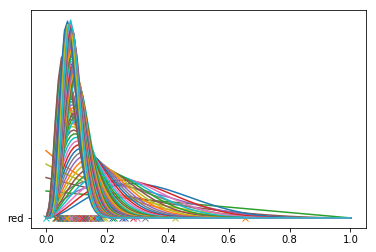

In [25]:
init_alpha = 1
init_beta = 1
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 100)
for i in range(0, 100):
    #iloc의 앞에 0은 i로 바뀔 것
    if samples.iloc[i,0] == 0 :
        #ads_12345...을 어떻게 불러올 것인지, beta.rvs에서 알파베타값 어떻게 올려줄 것인가
        alpha_ = 0
        bet = 1
        init_alpha += alpha_ 
        init_beta += bet
        ads_1 = beta.rvs(init_alpha, init_beta)

    else :
        alpha_ = 1
        bet = 0
        init_alpha += alpha_ 
        init_beta += bet
        ads_1 = beta.rvs(init_alpha, init_beta)
    
    ax.plot(x, beta.pdf(x, init_alpha, init_beta), 'r-', lw=3, alpha=0.0001, label='ads_1')
    ax.plot(ads_1, 0, 'x', 'red')

    ax.plot(x, beta.pdf(x, init_alpha, init_beta))
    
    #ax.plot(x, beta.pdf(x, 1, 1), 'r-', lw=3, alpha=0.6, label='ads_1')
    #ax.plot(ads_1, 0, 'x', 'red')

In [93]:
samples.head()

,Ads1,Ads2,Ads3,Ads4,Ads5,Ads6,Ads7,Ads8,Ads9,Ads10
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0


In [113]:
samples.iloc[0,max_rvs_ad]

0